In [4]:
%matplotlib notebook
from beam_tomo import *
plt.rcParams['figure.max_open_warning'] = 50
from scipy.optimize import curve_fit

# Previous work on beam tomography 

Link for report with previous beam tomography:(link)[https://docs.google.com/document/d/1uOGDw6qHZKiGV28OnOs043JRSdri8LaaIsc8oYo4Qxg/edit#bookmark=id.4wuwfttv8kr]


The script and ipython notebooks were originally saved in the G drive folder, together with the data. 
On 10/1/2024 I have placed the script and ipython notebooks on the Github folder.

# Description of measurements 

1. Acquisition #1 - 17.29.50 tomography.pkl (z from 14.6 to 16.6, PWM = 7%, exp = 1/40 000, 25us)
2. Acquisition #2 - 17.44.35 tomography.pkl (z from 14.6 to 17.6, PWM = 7%, exp = 1/40 000, 25us)

3. Acquisition #3 - 17.50.51 tomography.pkl (z from 14.6 to 18.6, PWM = 8%, exp = 1/40 000, 25us) - seems decoupled

4. Acquisition #4 - (re-coupled) - 17.56.48 tomography.pkl (z from 14.7 to 18.7)
5. Acquisition #5 - 18.02.48 tomography.pkl -same as acquisition 4, after rechecking coupling;


# List and prepare data

In [5]:
# Access folder with data in G drive
folder_path = "G:\Shared drives\VitreaLab Share\Lab Data\Light Engine Team\X-Reality Projects (XR)\Augmented Reality (AR)\Lab Data\AR\2023-12-05\beam_tomography\\"
folder_path = r"G:\Shared drives\VitreaLab Share\Lab Data\Light Engine Team\X-Reality Projects (XR)\Augmented Reality (AR)\Lab Data\AR\2023-12-05\beam_tomography\\"
files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
filenames = [item for item in files if ".pkl" in item]

# Parameters
filename = filenames[4]
file_path = os.path.join(folder_path, filename)
shape = (3, 10)
roi_width = 100

# Load data
tomo = Tomography(file_path, (3,10), roi_width)
tomo.load_data()

#Prepare data - rotate images, find coordinates of beams and widths of beams;
tomo.find_rot_spacing(angle_min = 46, angle_max = 47, angle_step = 0.25) # Find rotation angle of image wrt grid. Find grid spacing
tomo.init_coords() #Find coords of the first cross section
tomo.complete_coords_and_widths(debug = False) #Find coords for all the other layers

#Optional - single beam, for debugging
optional = False
if optional:
    id_x, id_y = 1, 5
    tomo.init_coords() #Find coords of the first cross section
    beam_i = tomo.beam_l[id_x][id_y]
    beam_i.complete_coords_and_widths(tomo.cross_sect_l, tomo.cross_sect_z_l, tomo.roi_width, debug = False)

Loaded
Tomography measurement:

        - Filename = G:\Shared drives\VitreaLab Share\Lab Data\Light Engine Team\X-Reality Projects (XR)\Augmented Reality (AR)\Lab Data\AR\2023-12-05\beam_tomography\\18.02.48 tomography.pkl

        - Number of beam rows = 3

        - Number of beam cols = 10

        - Z-spacing: 0.100mm

        - Number of cross sections: 40
        
Extracting rotation angle for the lowest z cross section.


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.06it/s]


Optimal rotation angle = 46.75deg
Extracting the grid spacing
Average spacing [px] between beams = 145.95
Updating the rotation angle and rotated image for each cross section.


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:07<00:00,  5.24it/s]


Coordinates of beam in first layer were determined.


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.17it/s]


# Visualise of data -> Manually find max_z_fit value

The **max_z_fit value** corresponds to highest/tallest **useful cross section**. It is defined within the tomography by specifying the corresponding z-value. For cross section higher than this threshold, the beam image deviates significantly from the gaussian fit.

## plot beams trajectory and width

<IPython.core.display.Javascript object>


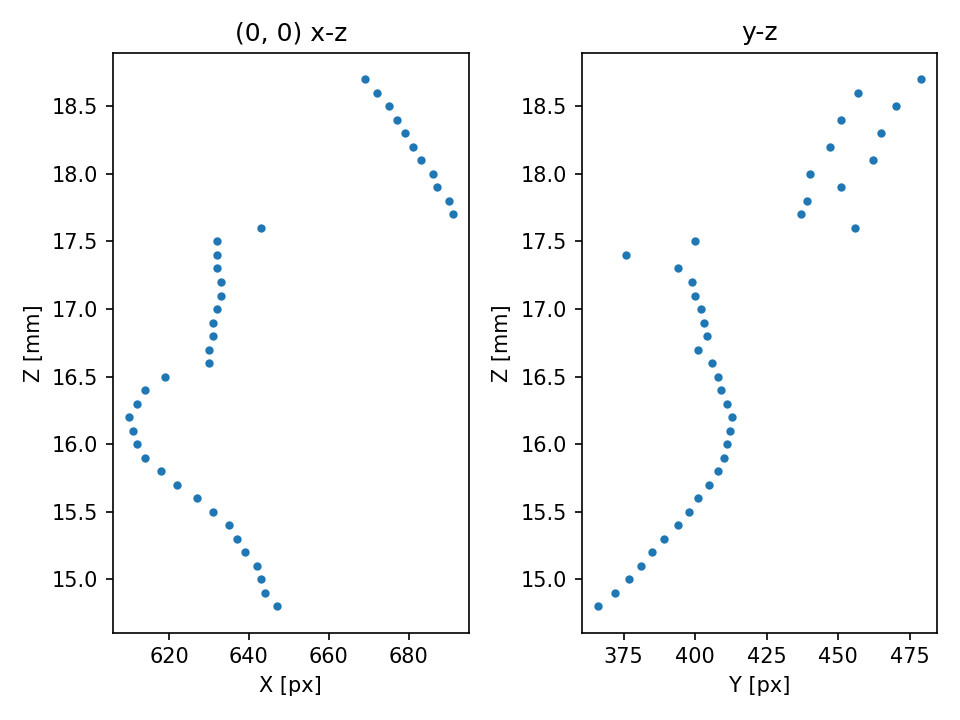

<IPython.core.display.Javascript object>


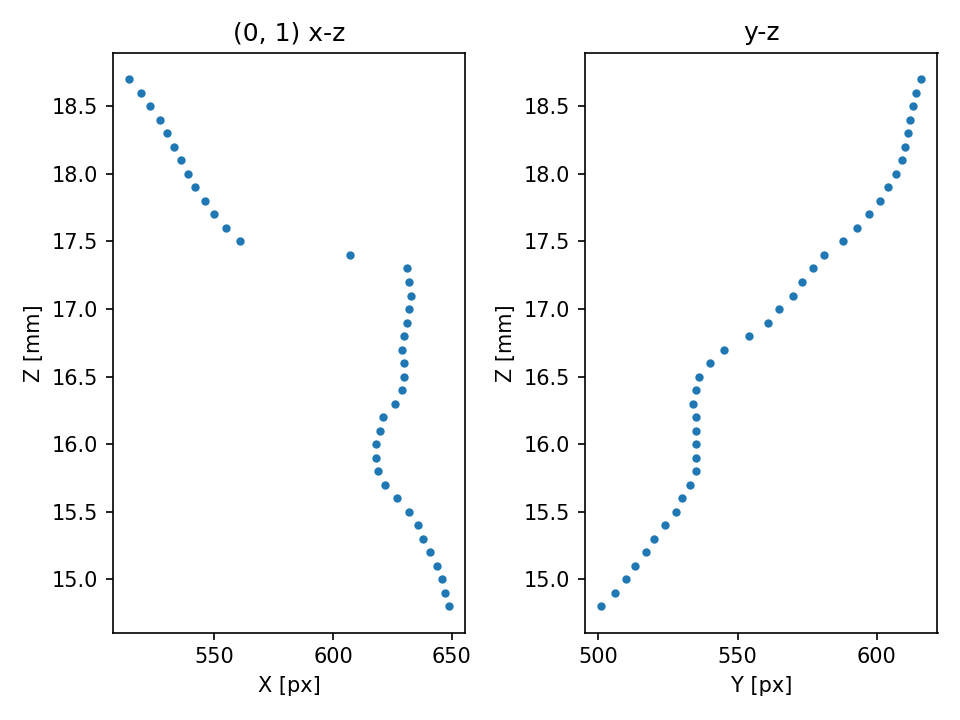

<IPython.core.display.Javascript object>


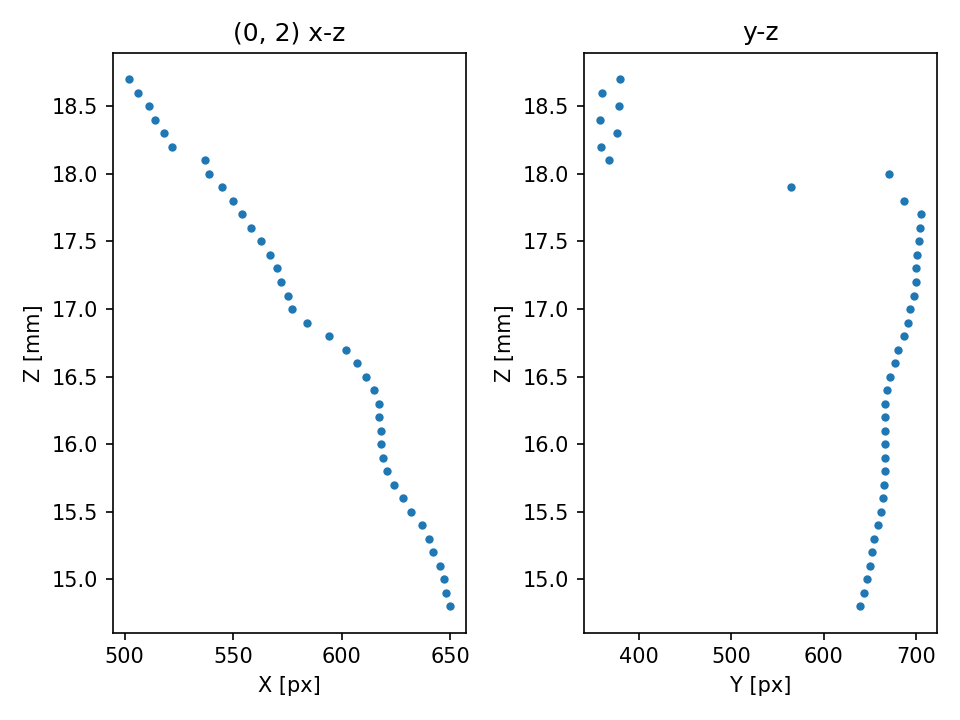

<IPython.core.display.Javascript object>


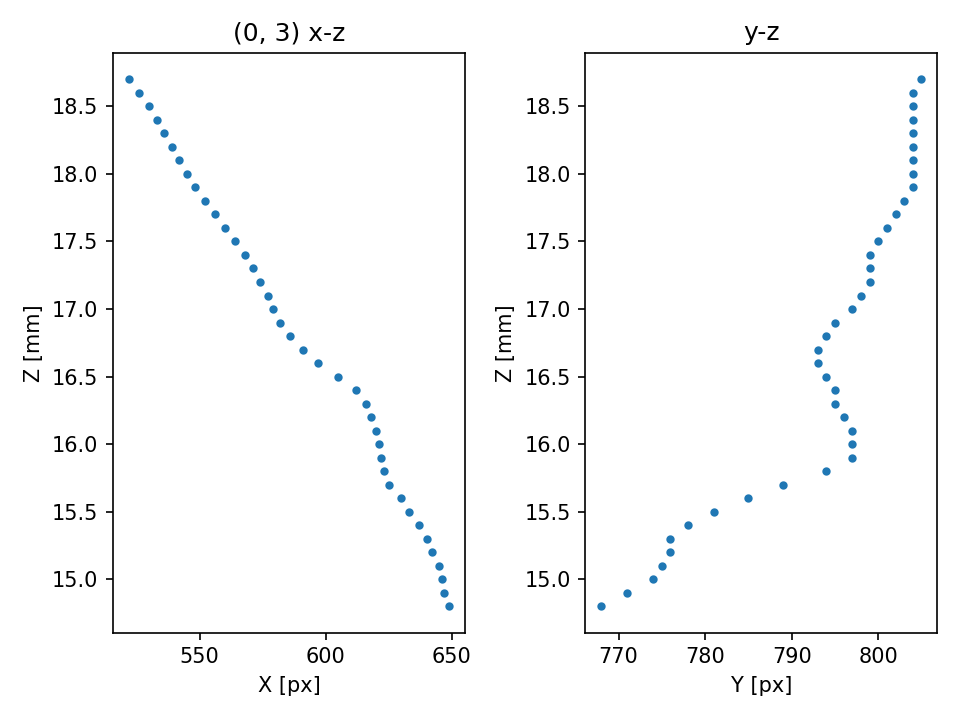

<IPython.core.display.Javascript object>


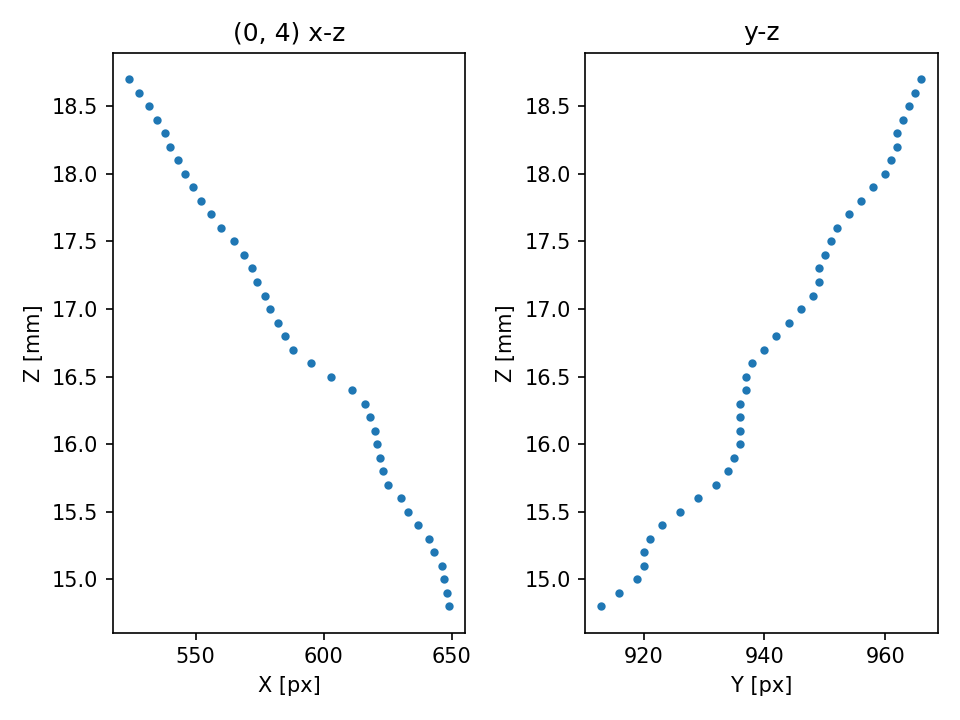

<IPython.core.display.Javascript object>


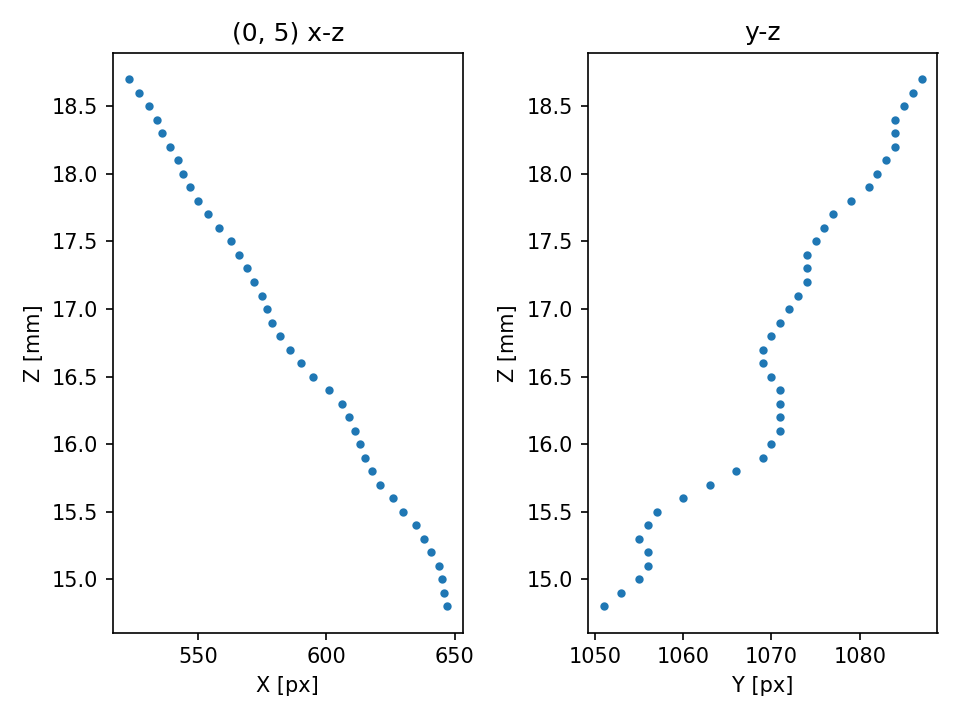

<IPython.core.display.Javascript object>


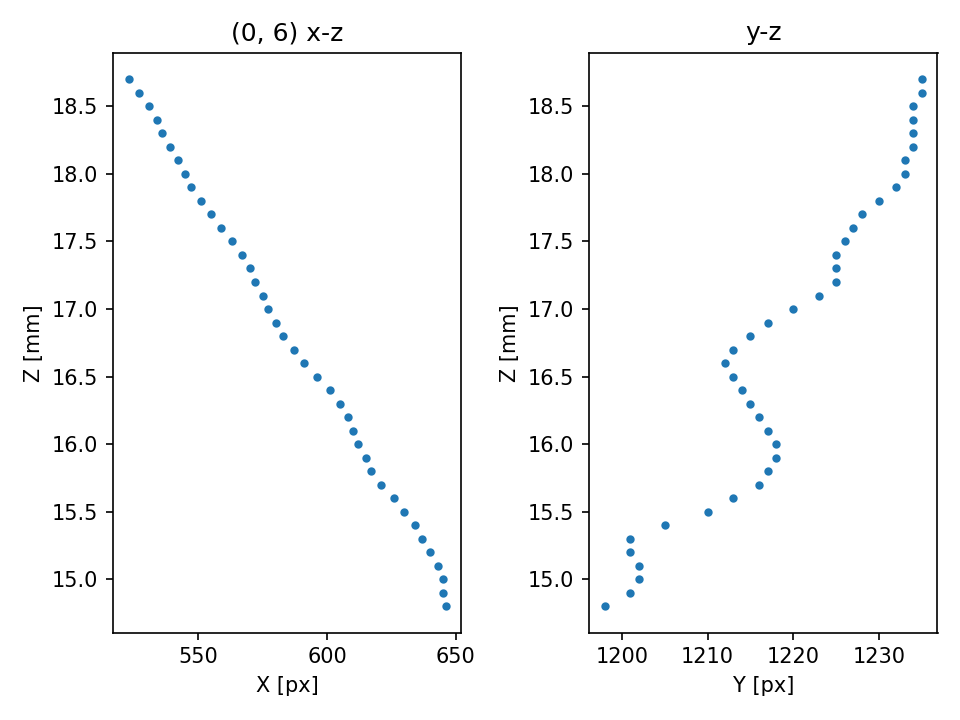

<IPython.core.display.Javascript object>


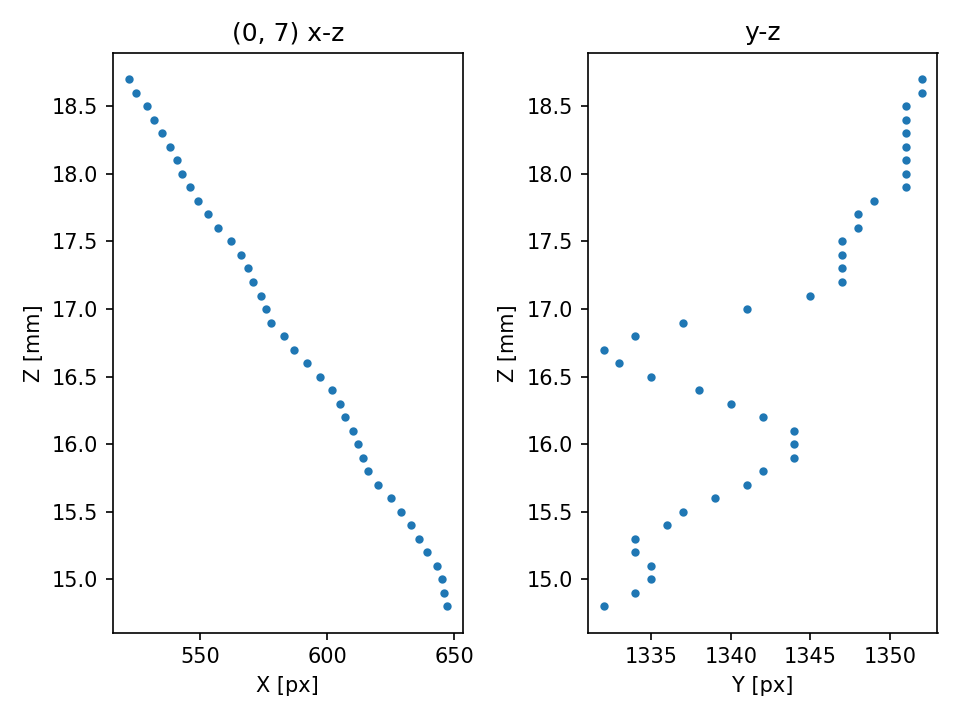

<IPython.core.display.Javascript object>


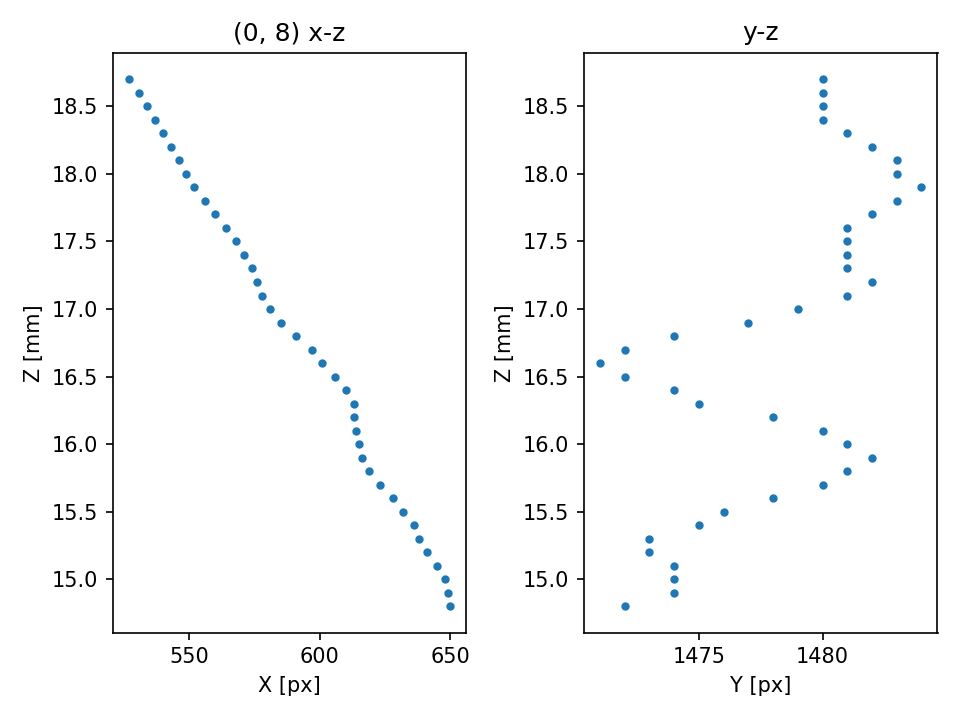

<IPython.core.display.Javascript object>


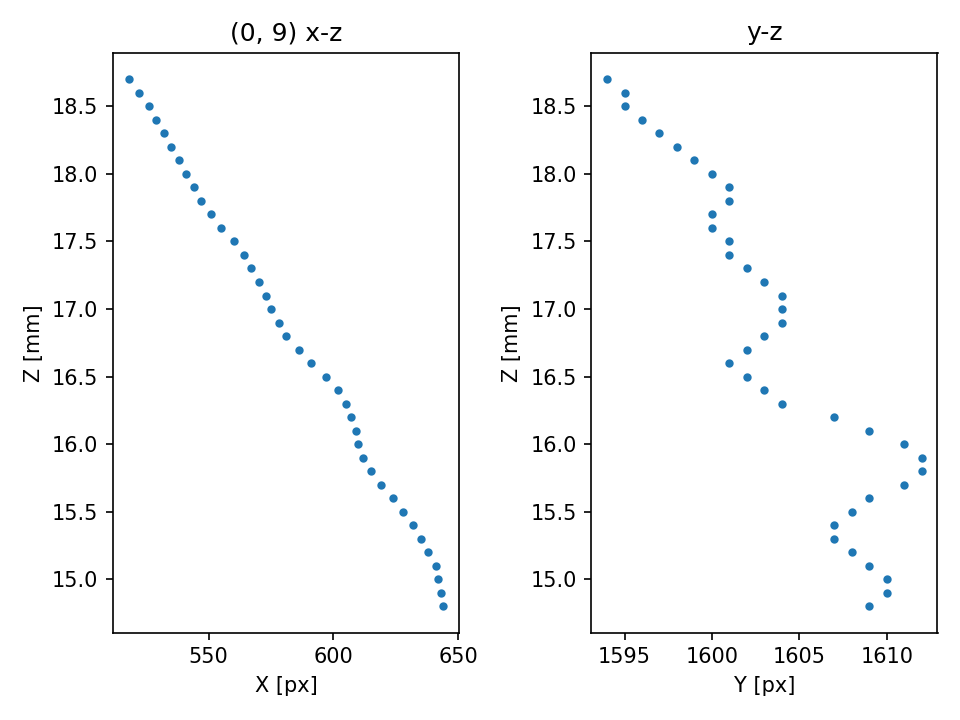

<IPython.core.display.Javascript object>


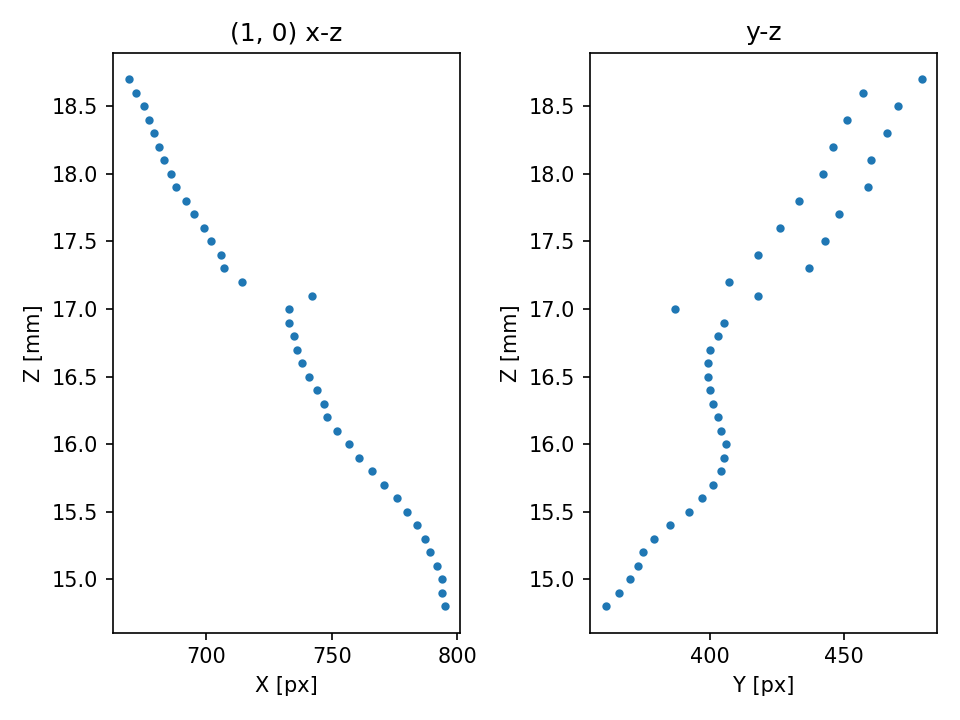

<IPython.core.display.Javascript object>


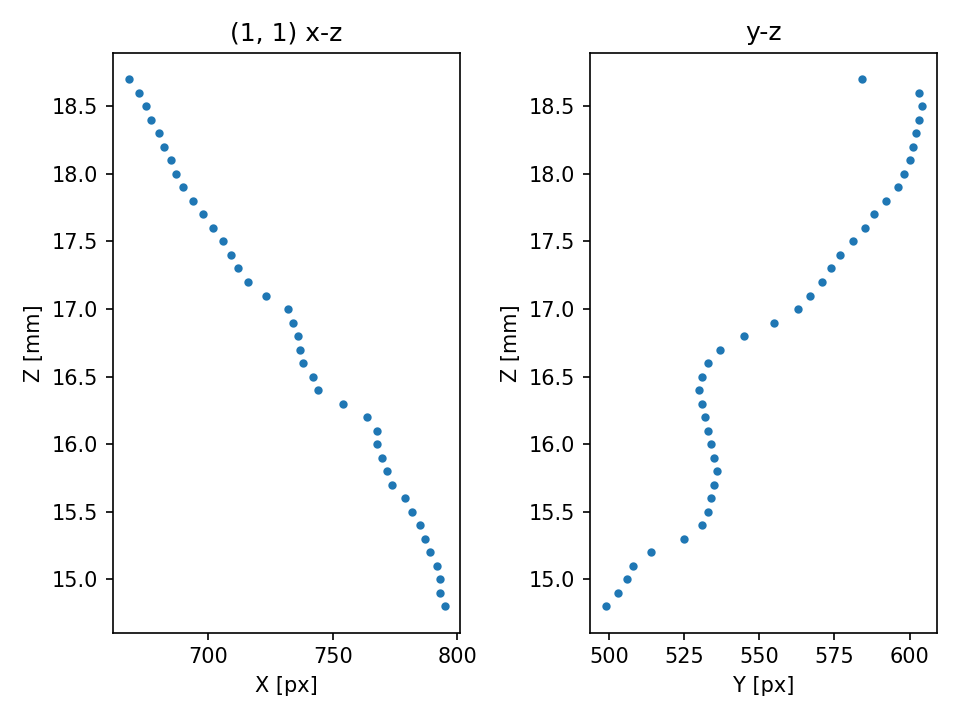

<IPython.core.display.Javascript object>


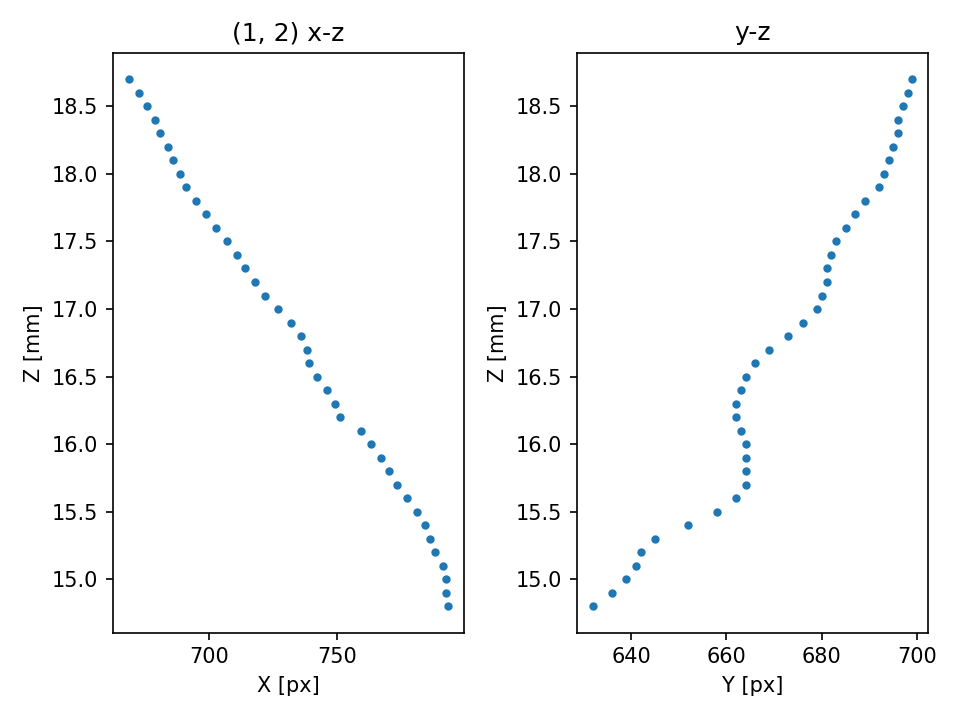

<IPython.core.display.Javascript object>


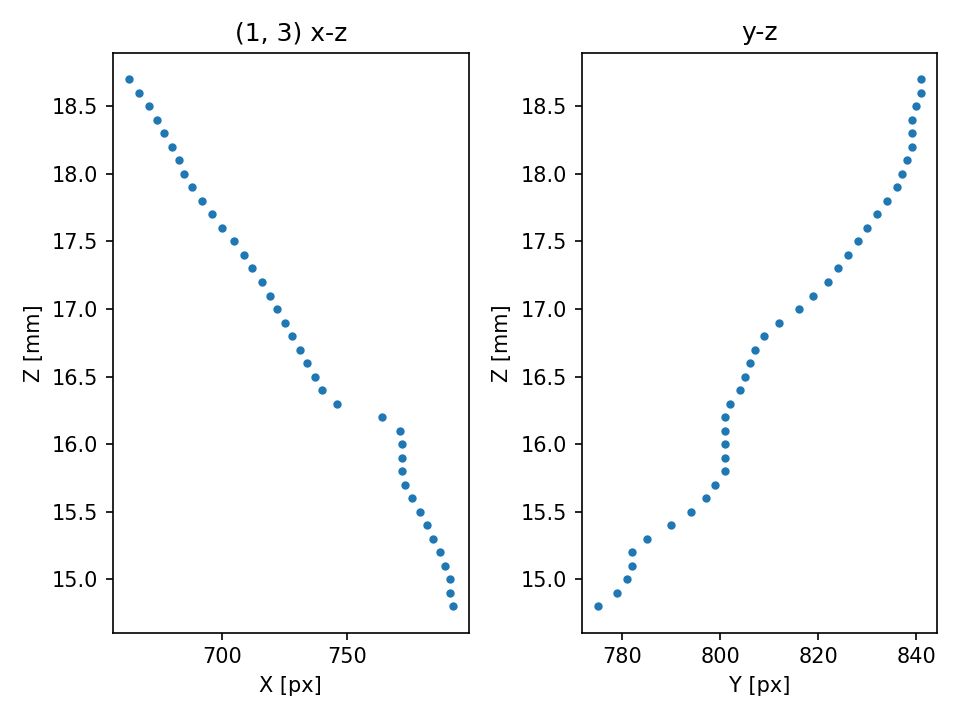

<IPython.core.display.Javascript object>


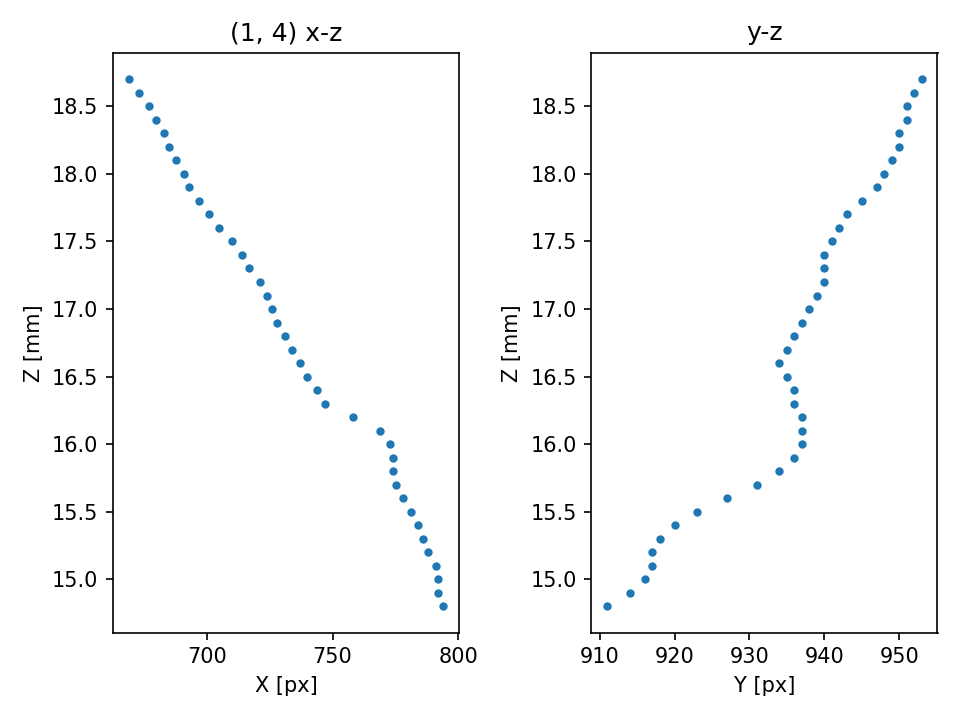

<IPython.core.display.Javascript object>


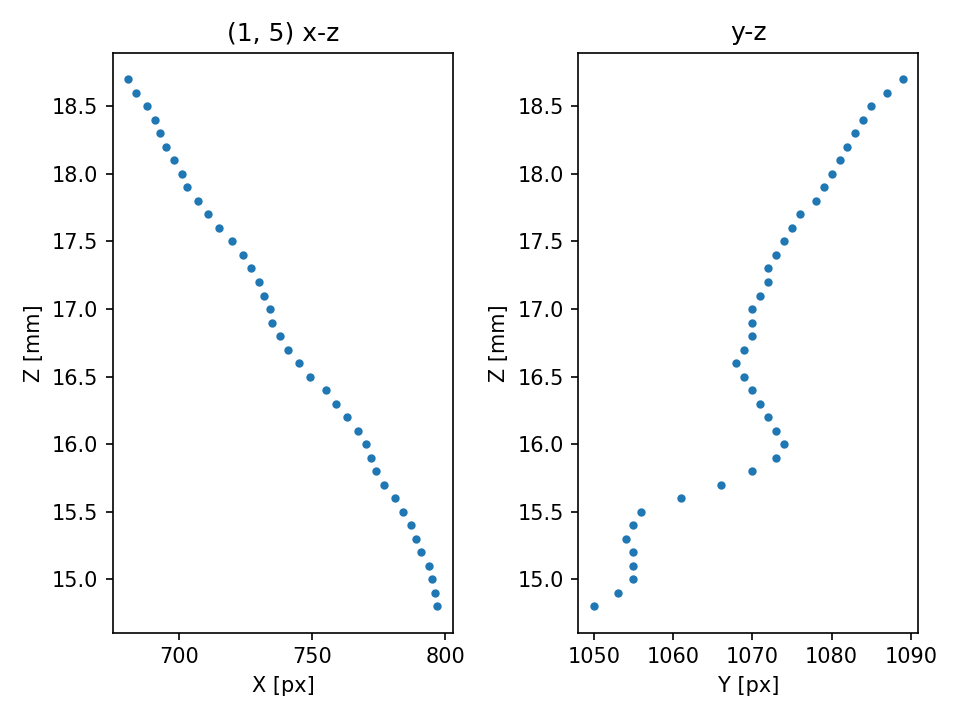

<IPython.core.display.Javascript object>


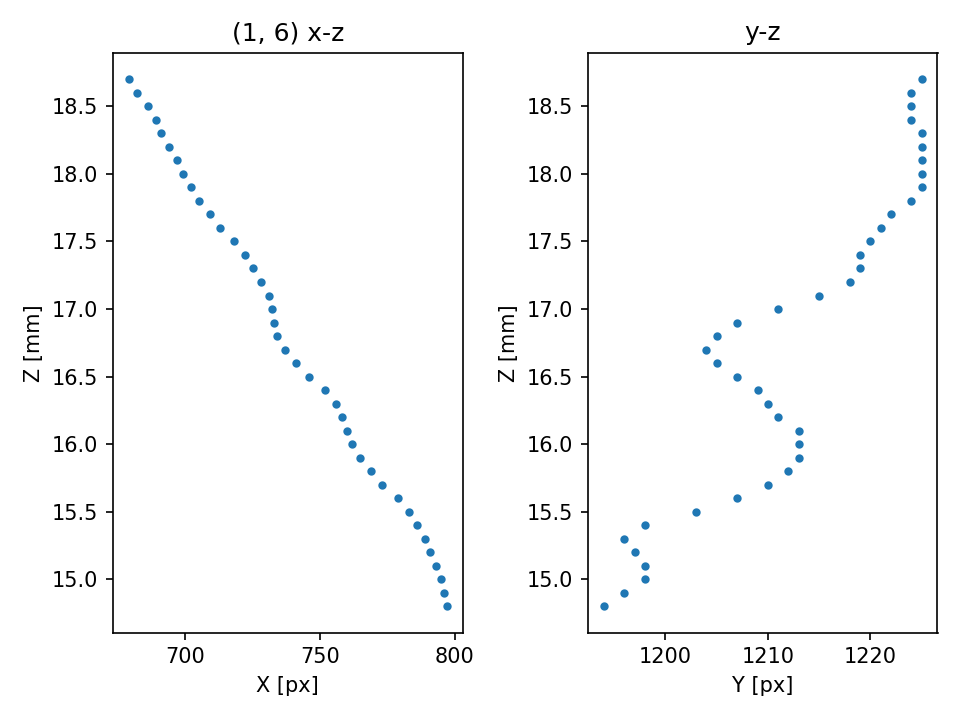

<IPython.core.display.Javascript object>


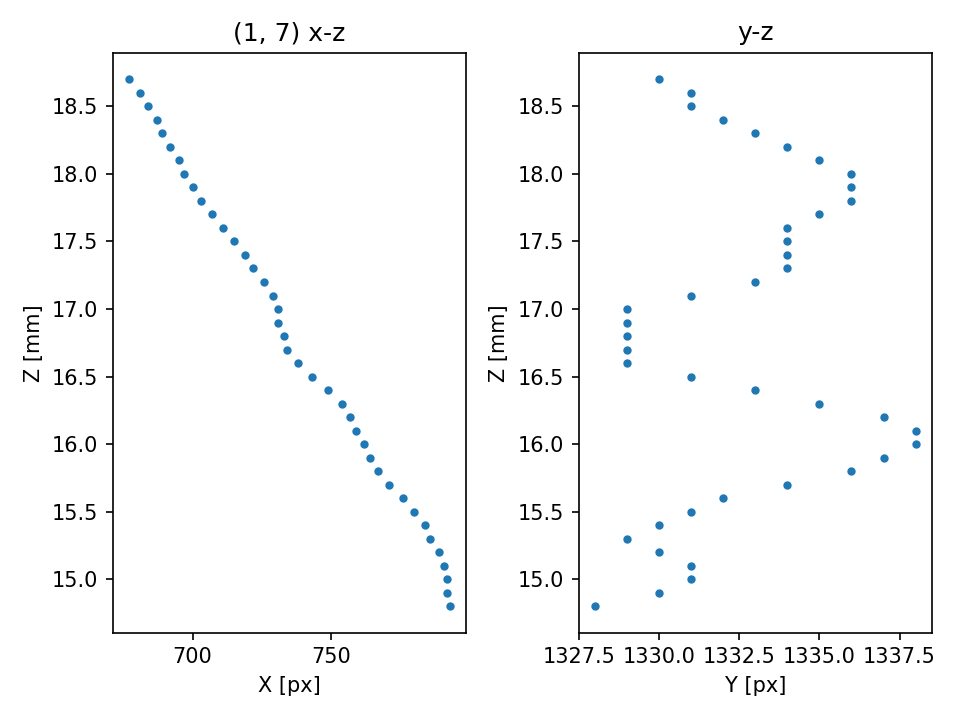

<IPython.core.display.Javascript object>


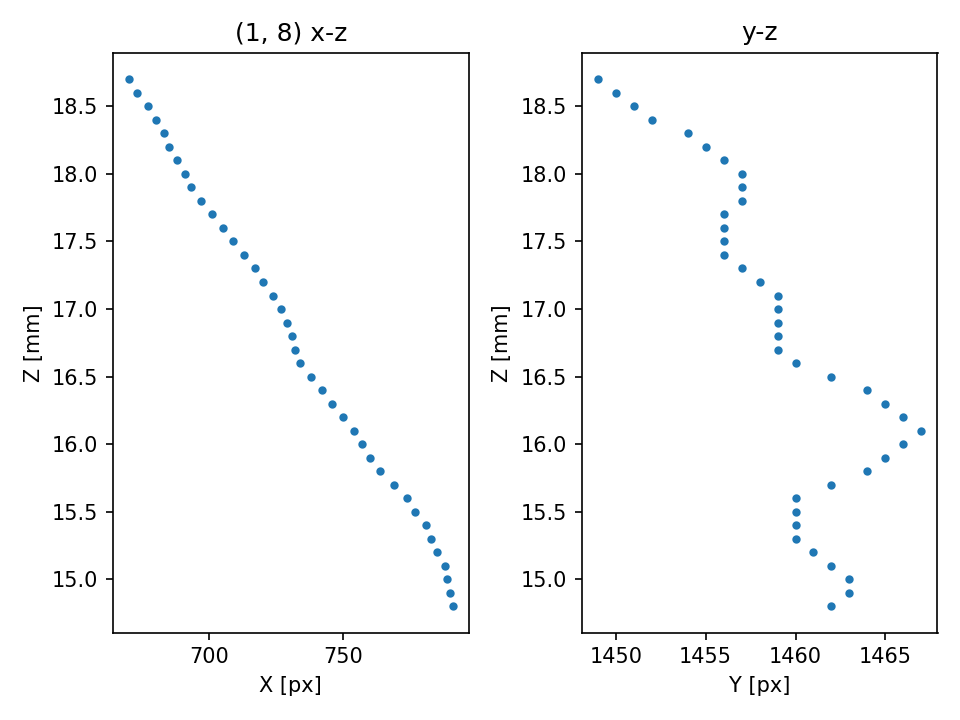

<IPython.core.display.Javascript object>


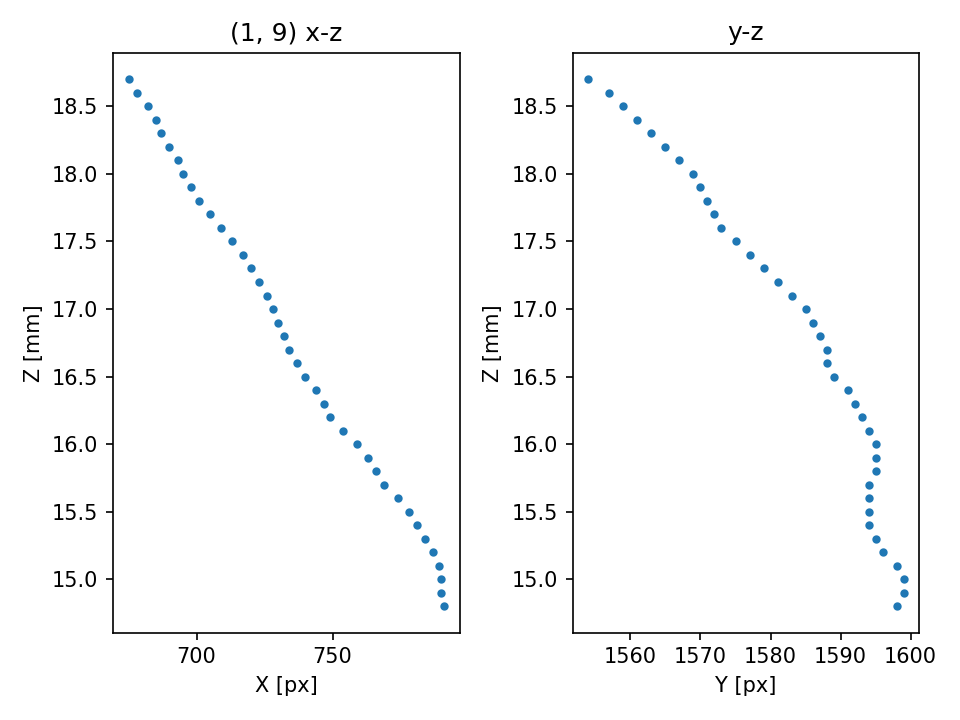

In [6]:
for id_x in range(2):
    for id_y in range(10):
        beam_i = tomo.beam_l[id_x][id_y]
        beam_i.plot_trajectory(limit_z_fit = False)

## Plot single beam width evolution

<IPython.core.display.Javascript object>


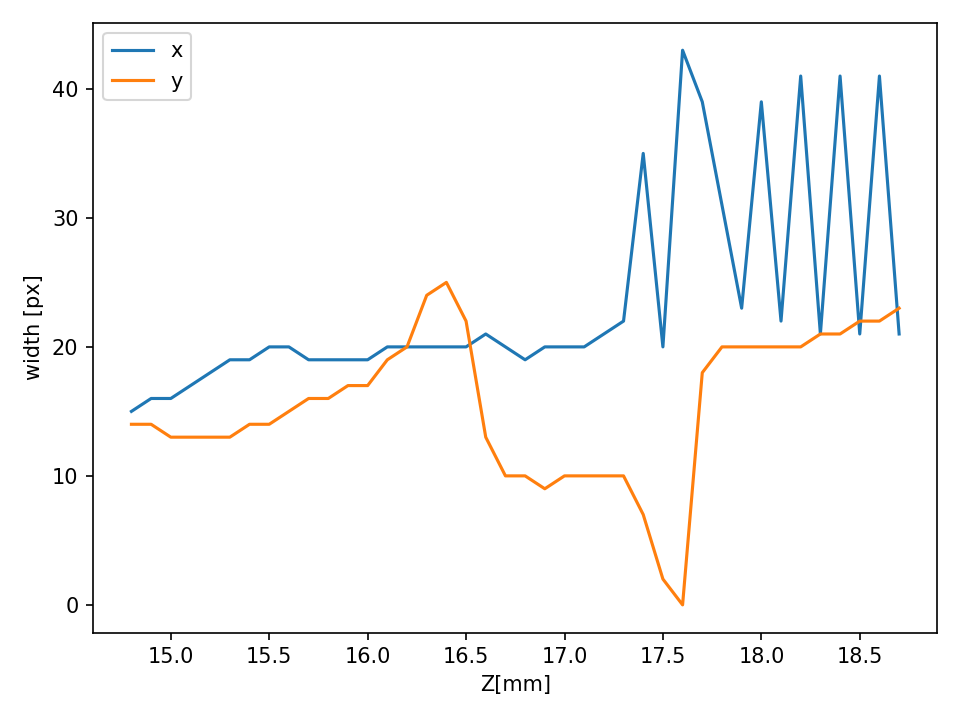

<IPython.core.display.Javascript object>


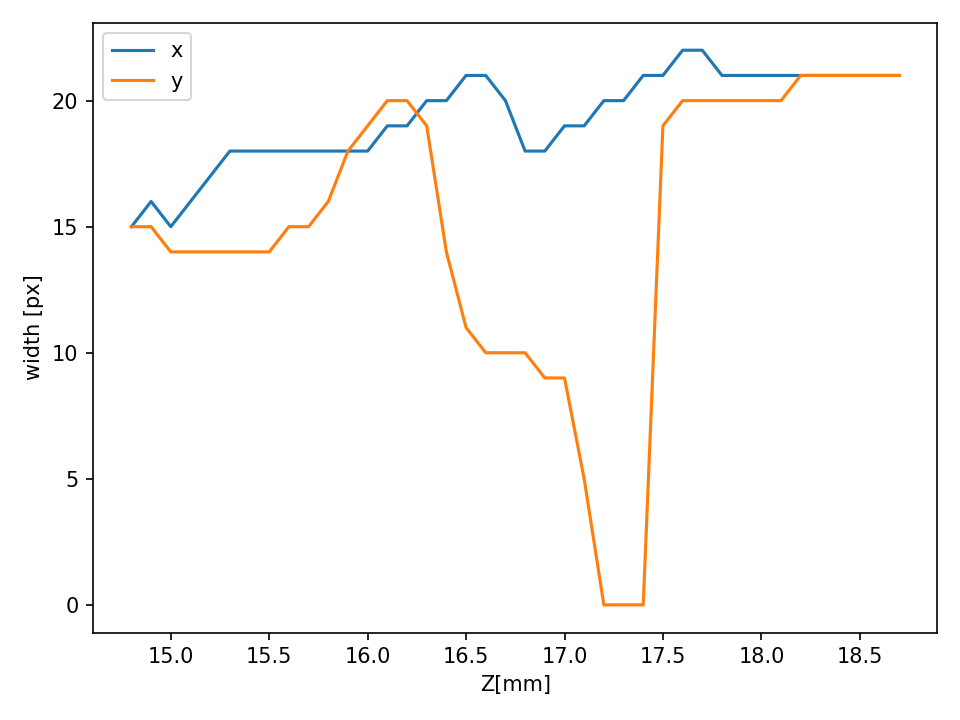

<IPython.core.display.Javascript object>


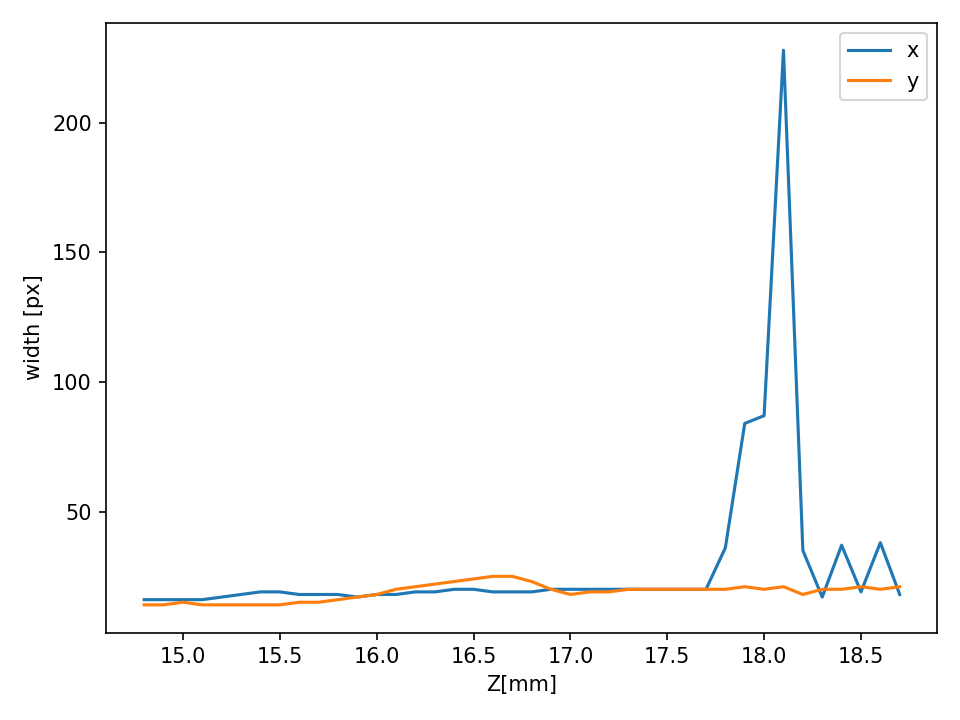

<IPython.core.display.Javascript object>


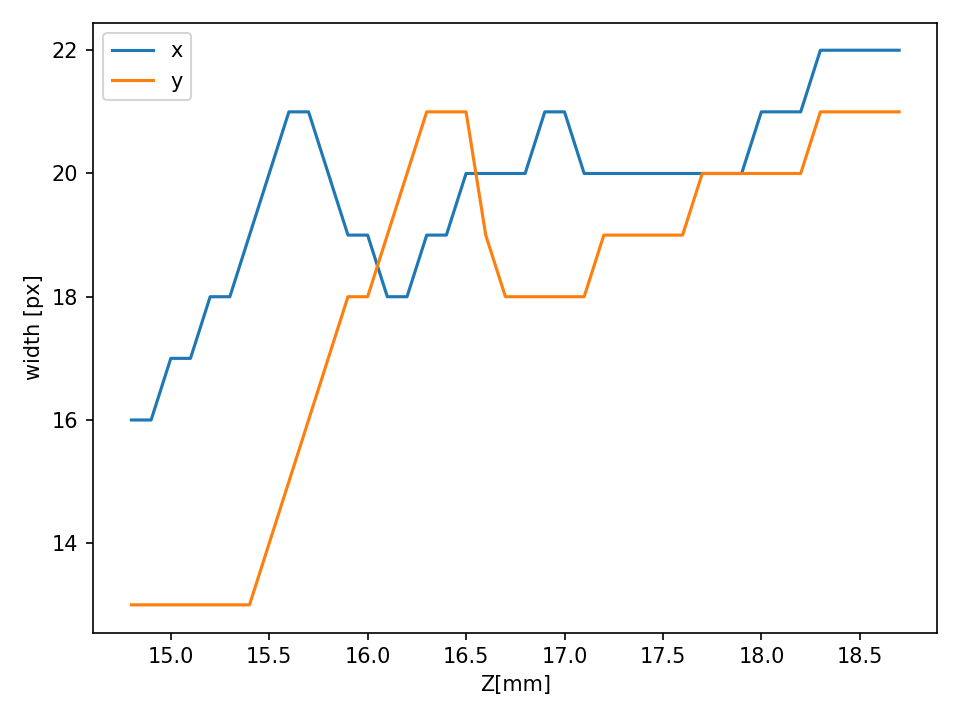

<IPython.core.display.Javascript object>


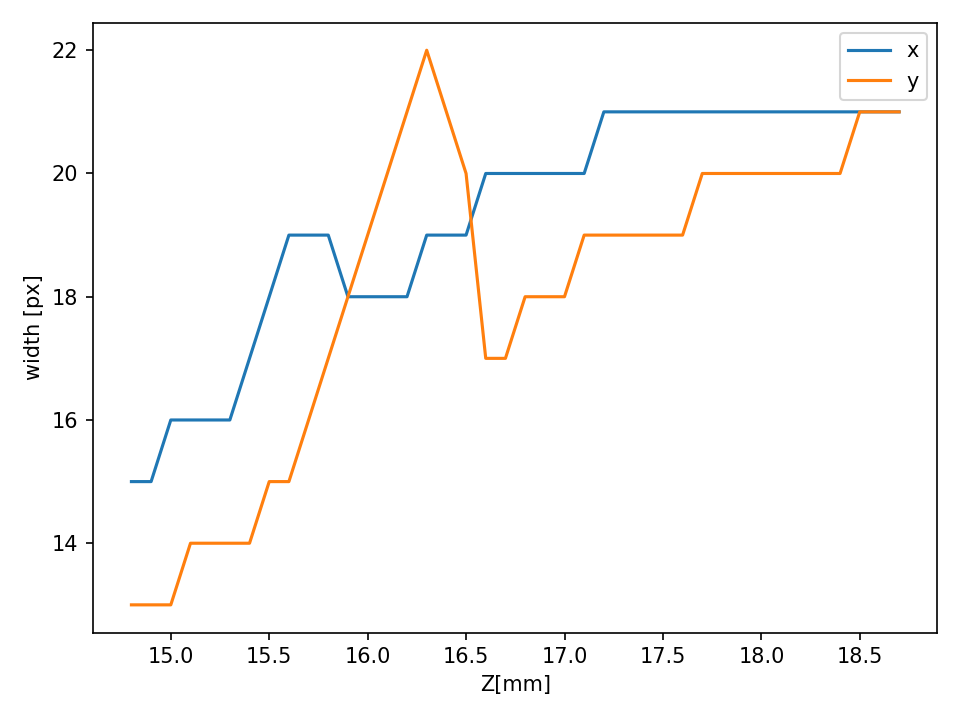

<IPython.core.display.Javascript object>


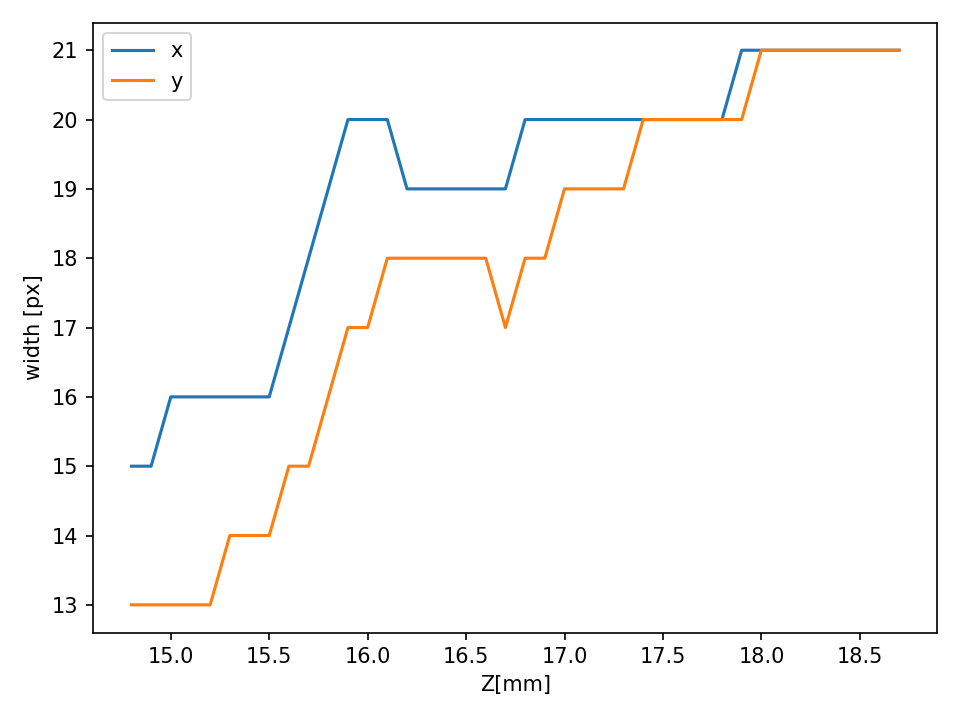

<IPython.core.display.Javascript object>


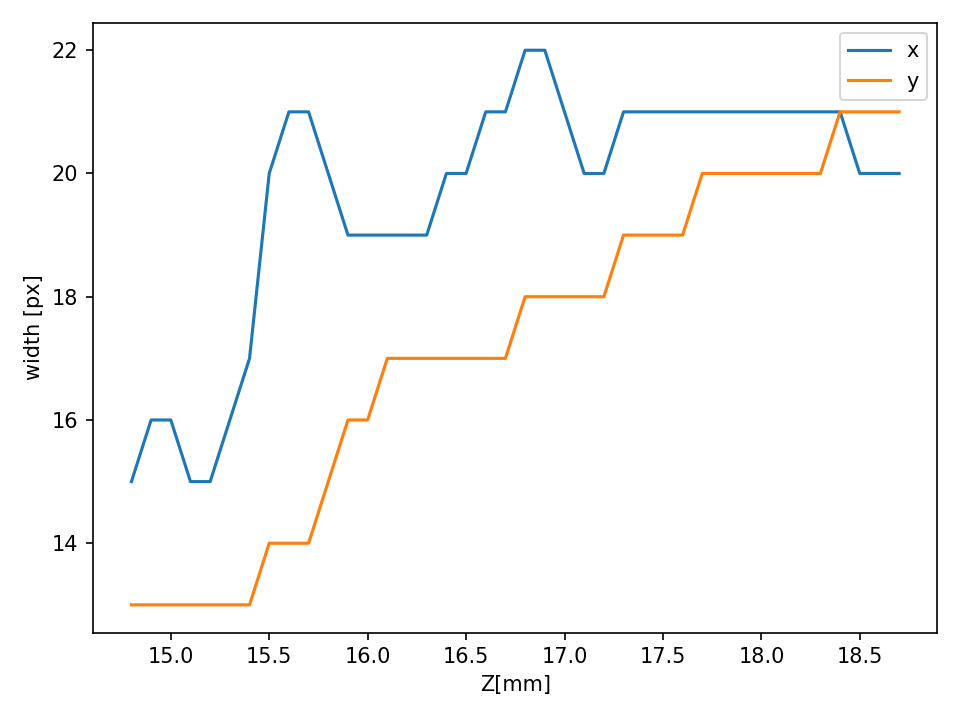

<IPython.core.display.Javascript object>


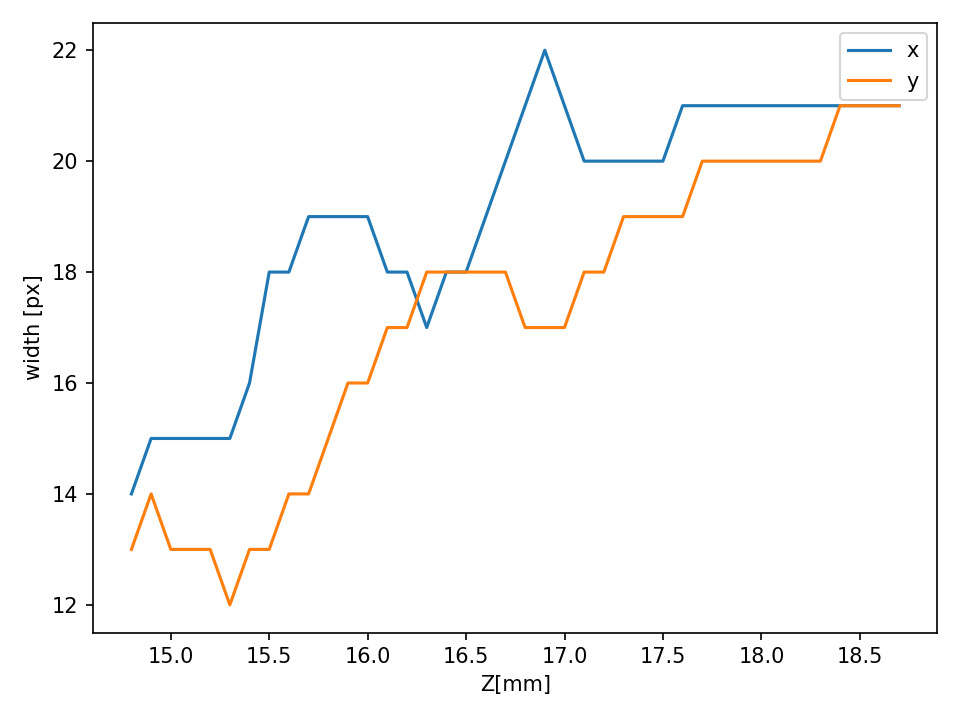

<IPython.core.display.Javascript object>


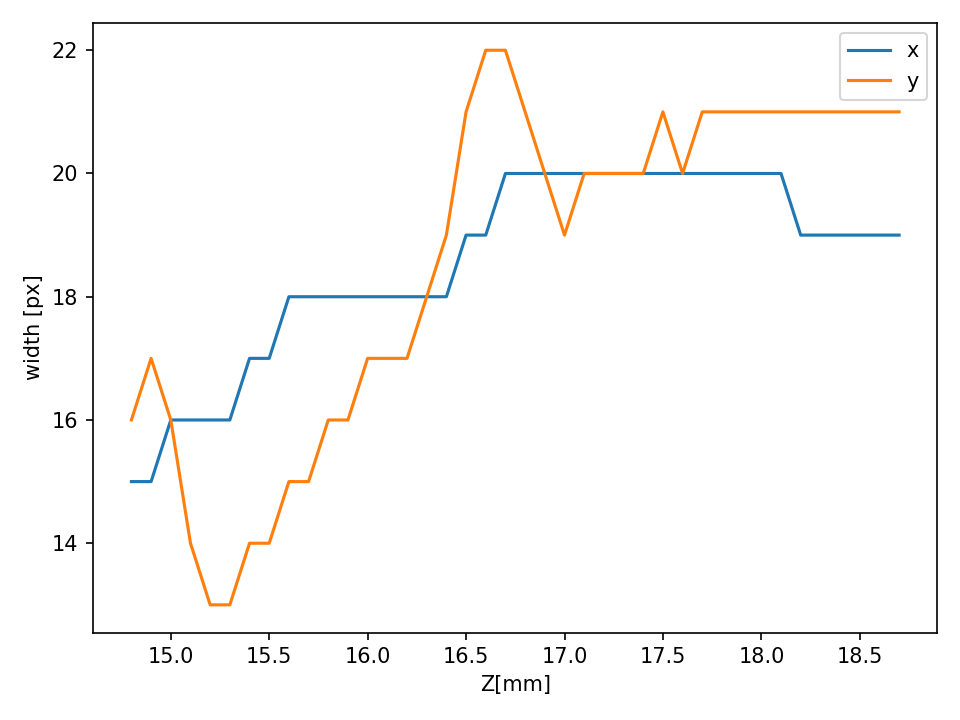

<IPython.core.display.Javascript object>


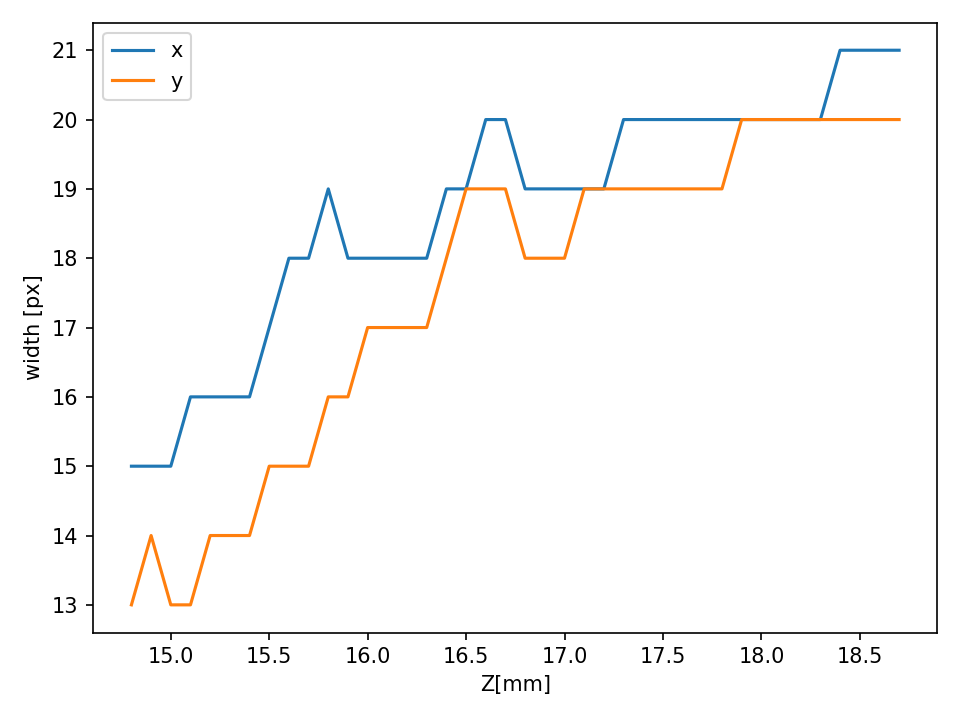

<IPython.core.display.Javascript object>


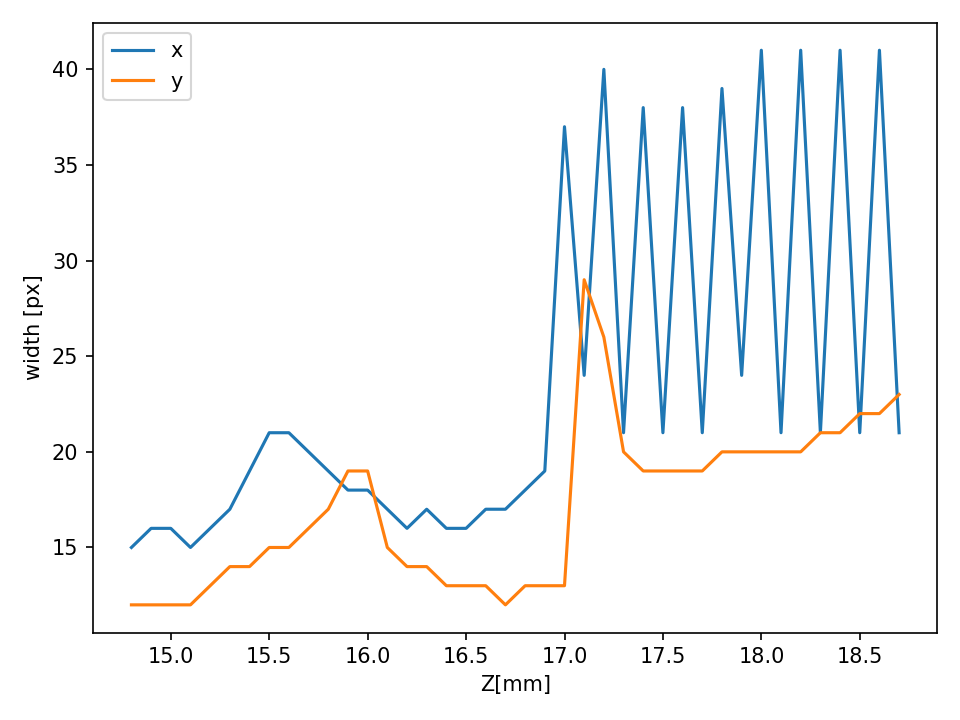

<IPython.core.display.Javascript object>


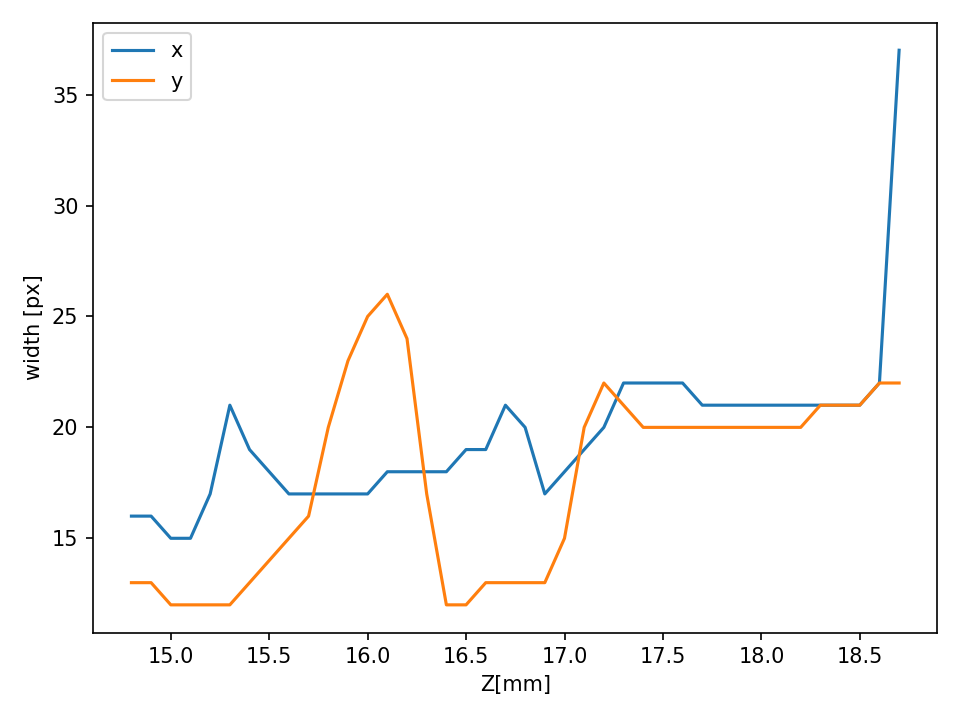

<IPython.core.display.Javascript object>


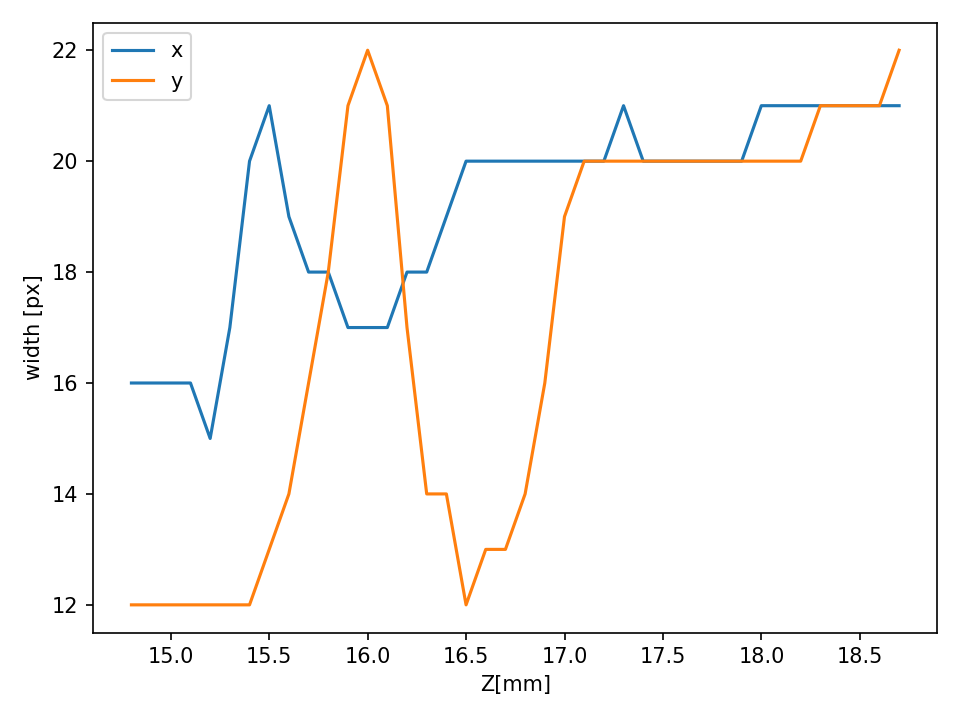

<IPython.core.display.Javascript object>


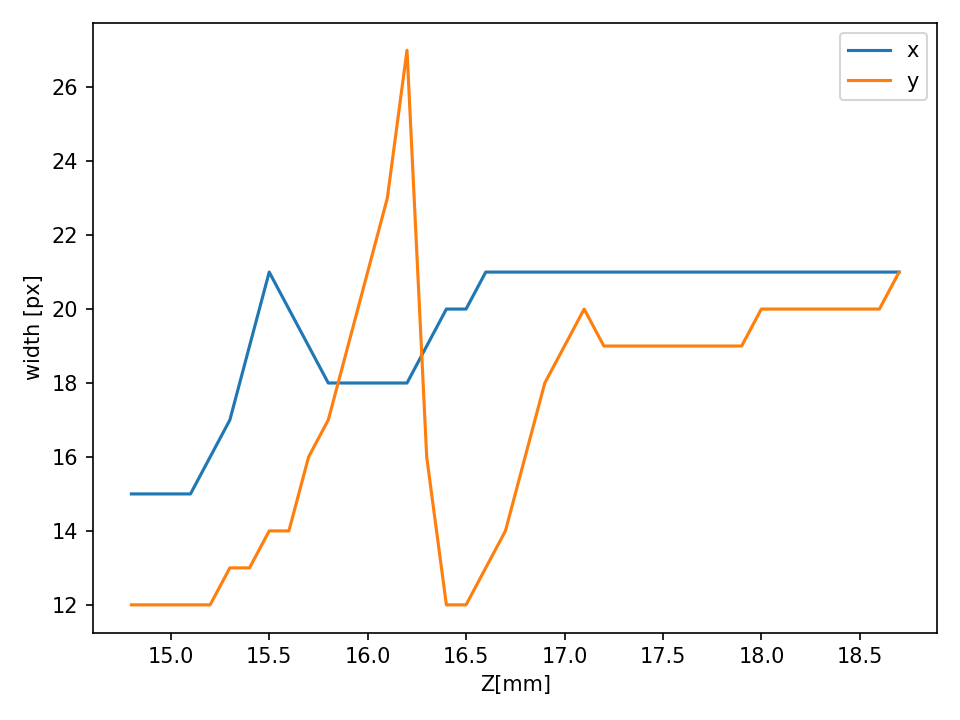

<IPython.core.display.Javascript object>


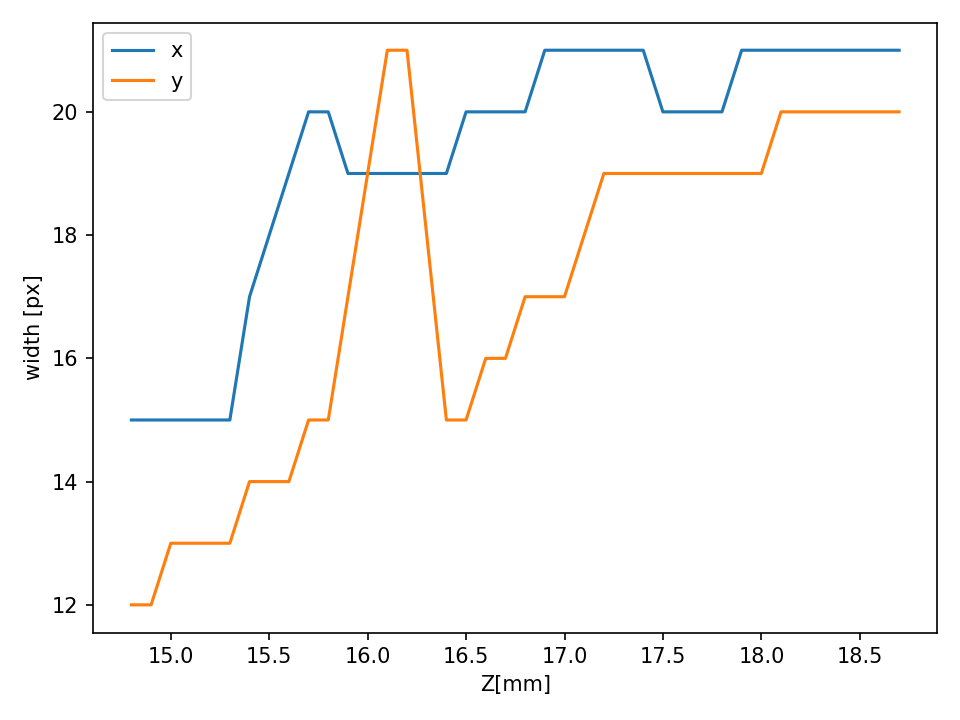

<IPython.core.display.Javascript object>


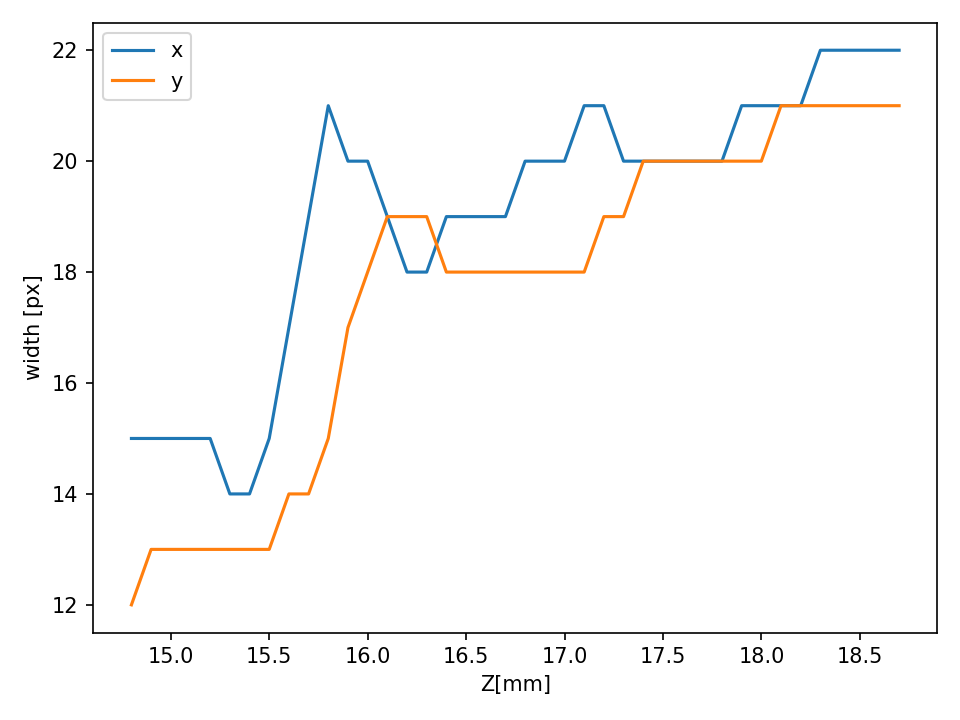

<IPython.core.display.Javascript object>


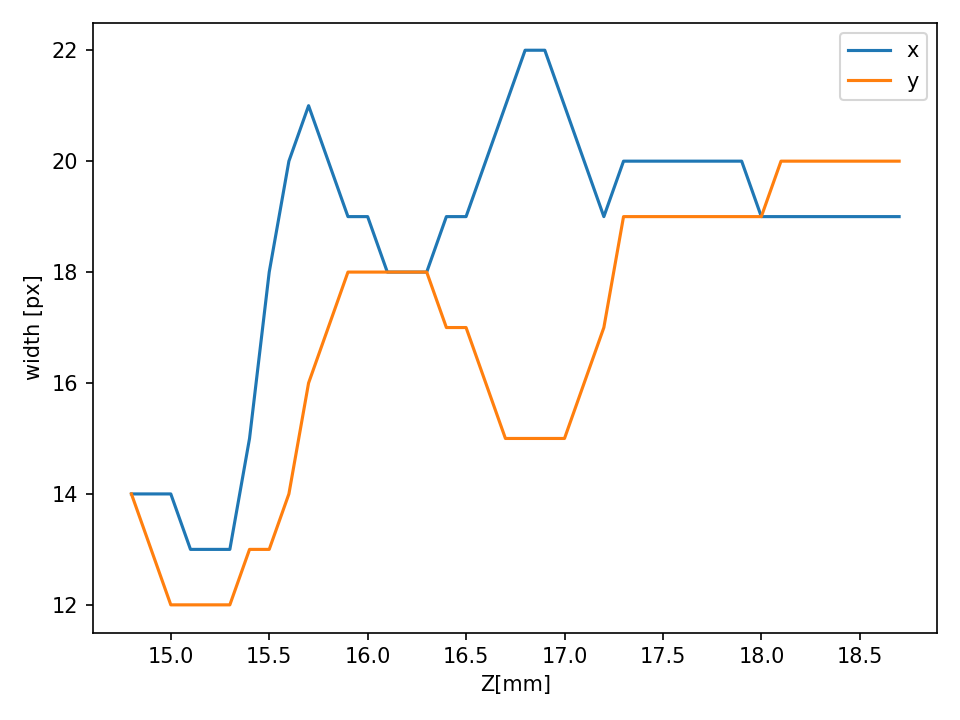

<IPython.core.display.Javascript object>


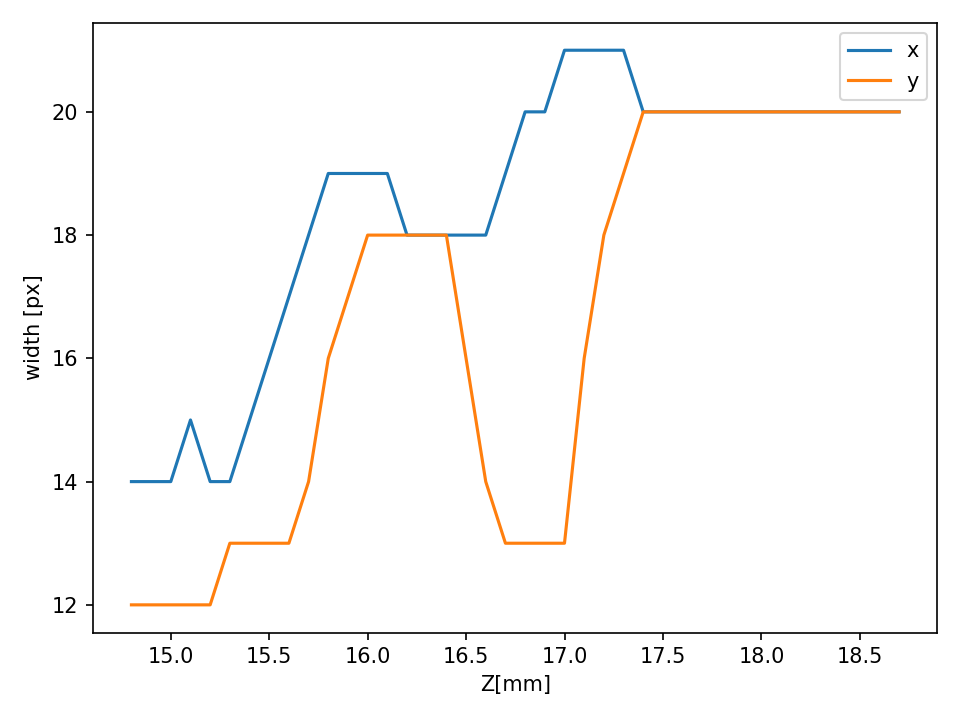

<IPython.core.display.Javascript object>


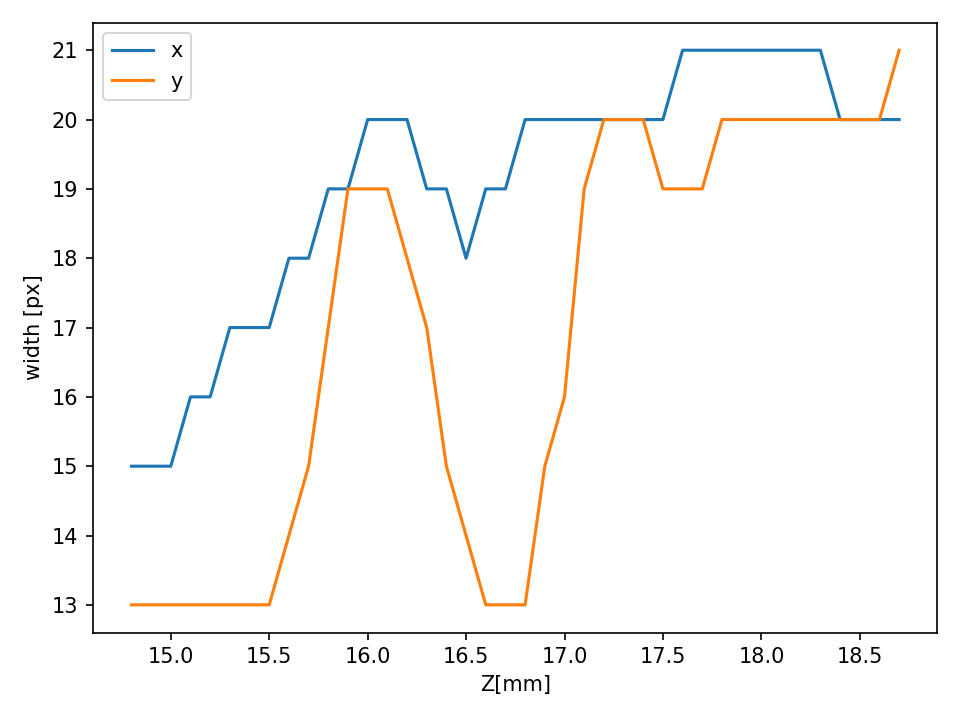

<IPython.core.display.Javascript object>


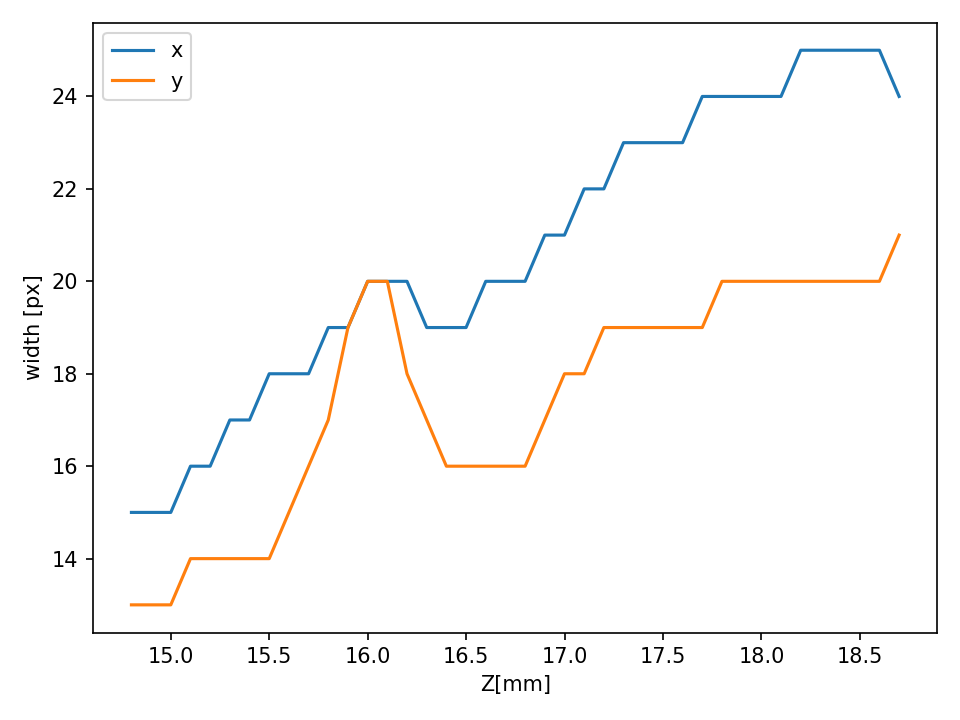

<IPython.core.display.Javascript object>


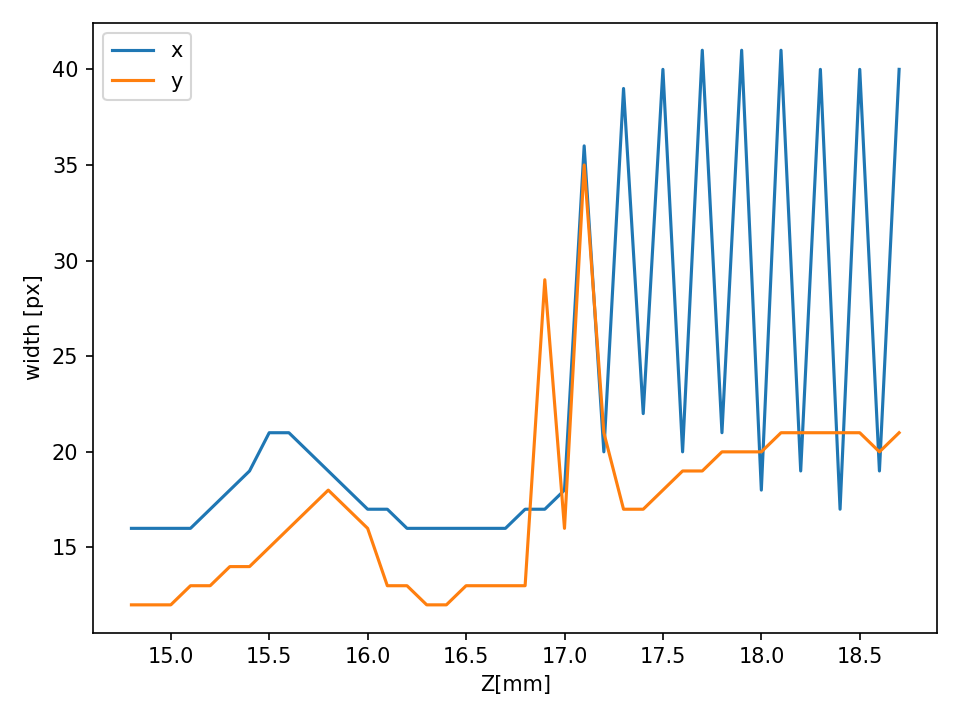

<IPython.core.display.Javascript object>


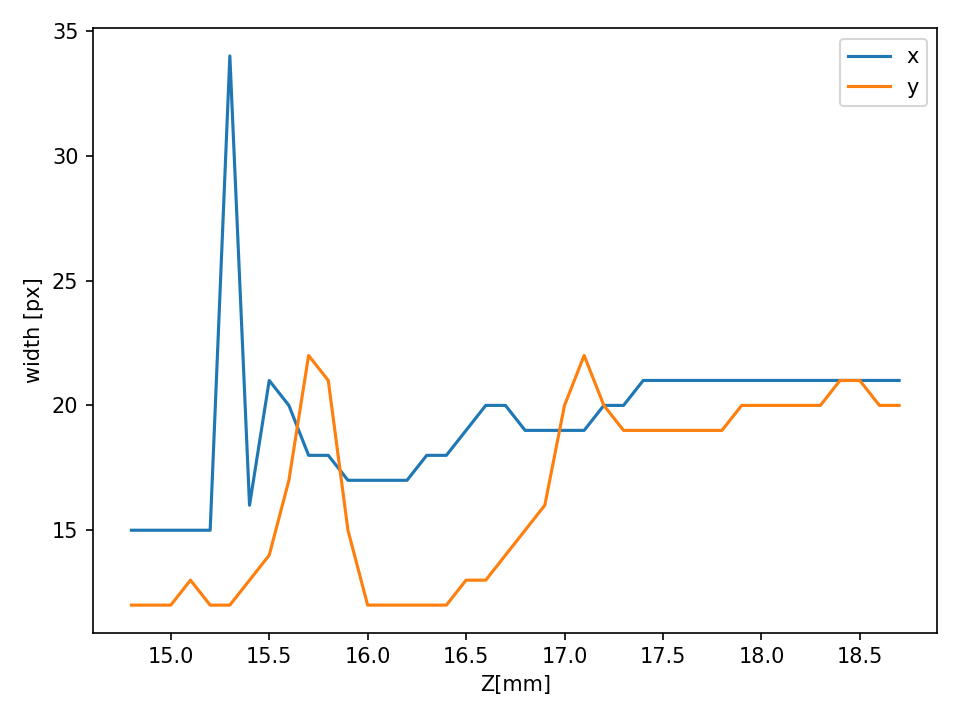

<IPython.core.display.Javascript object>


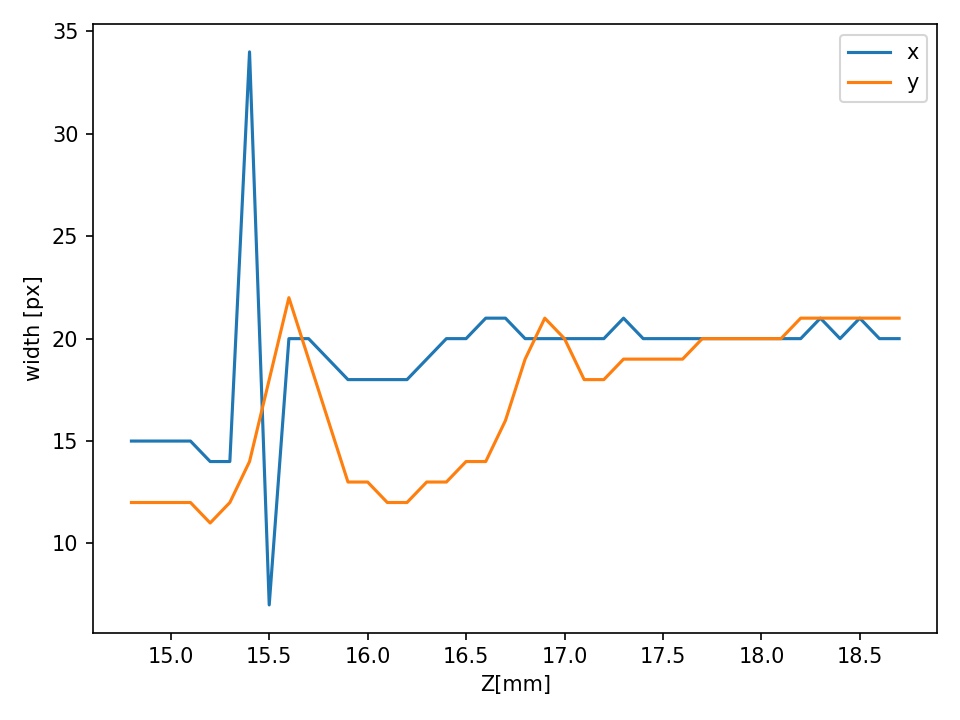

<IPython.core.display.Javascript object>


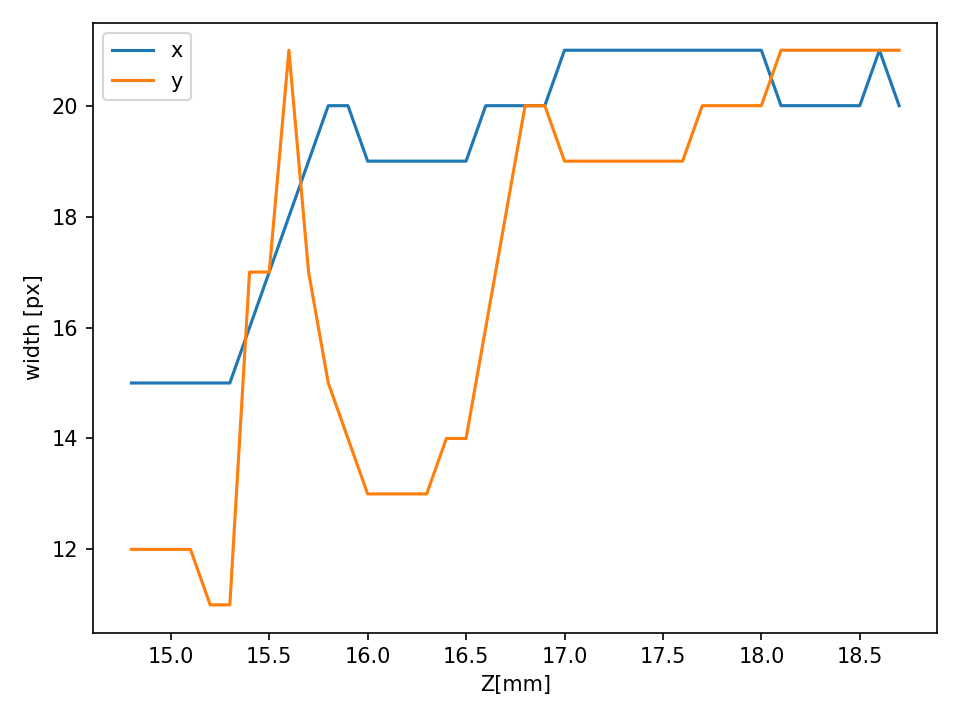

<IPython.core.display.Javascript object>


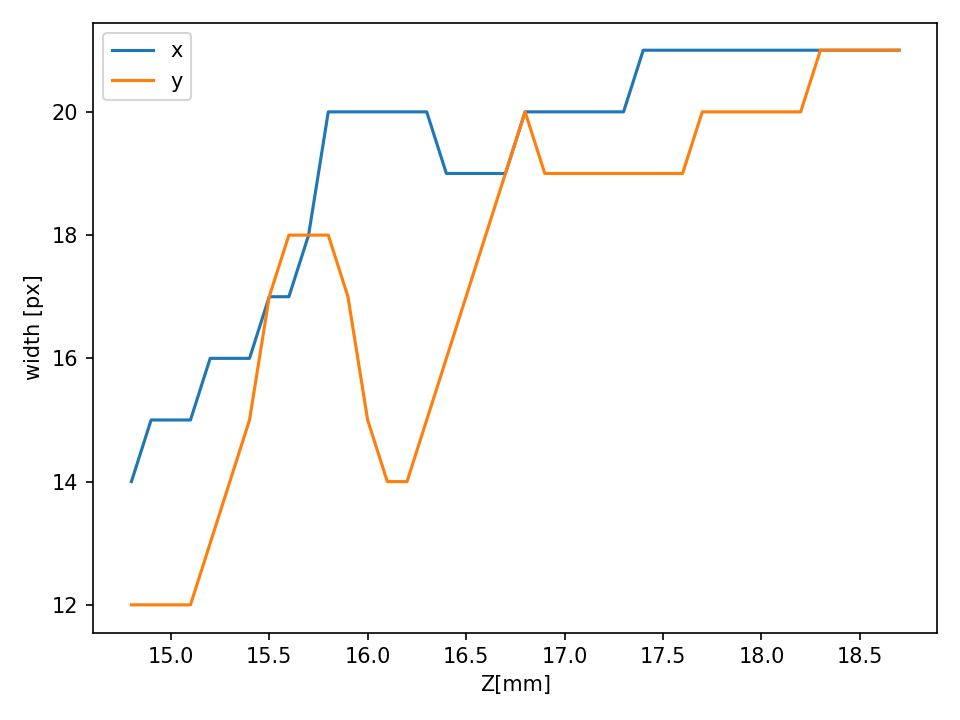

<IPython.core.display.Javascript object>


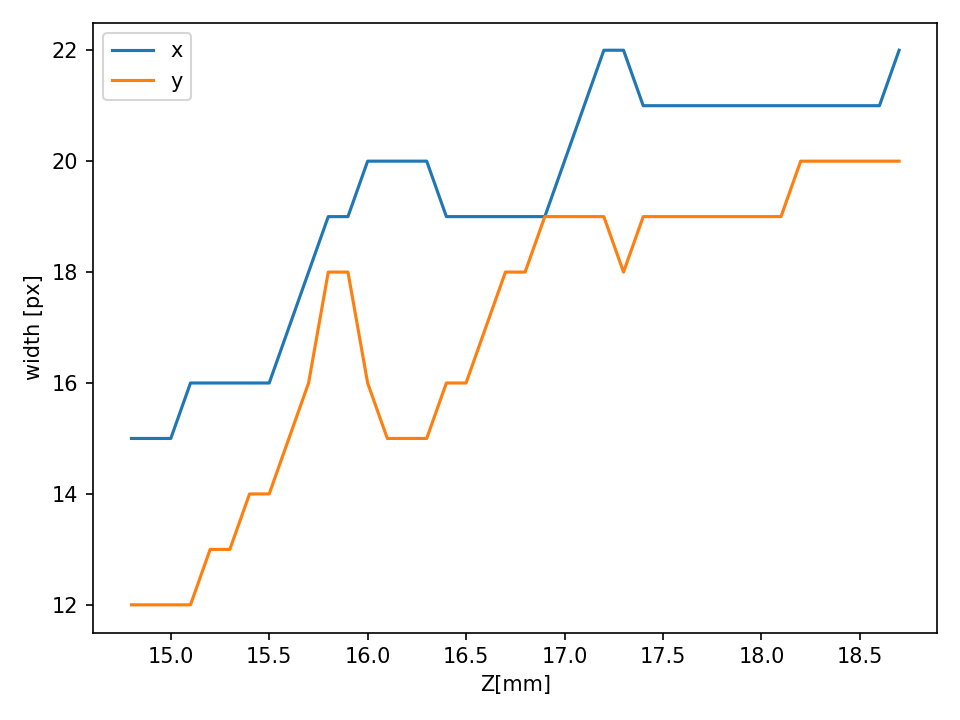

<IPython.core.display.Javascript object>


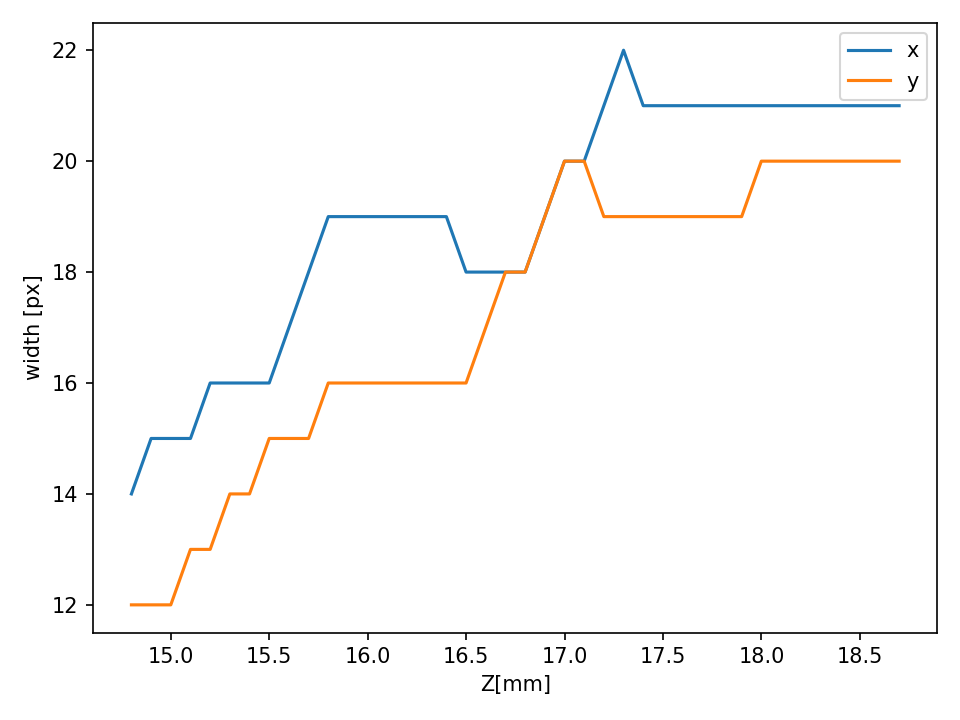

<IPython.core.display.Javascript object>


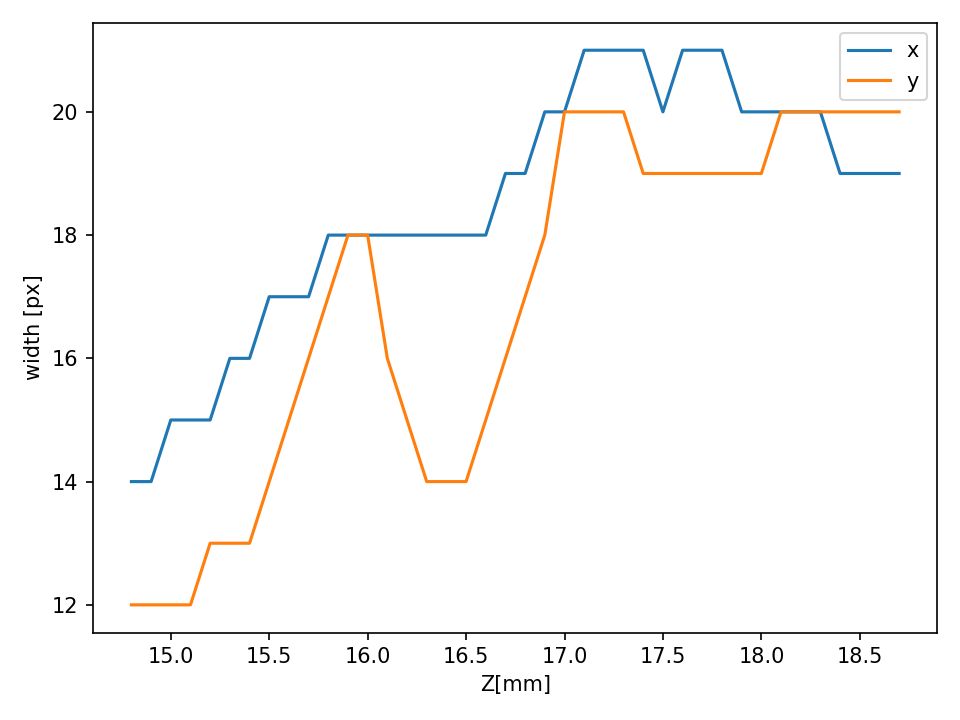

<IPython.core.display.Javascript object>


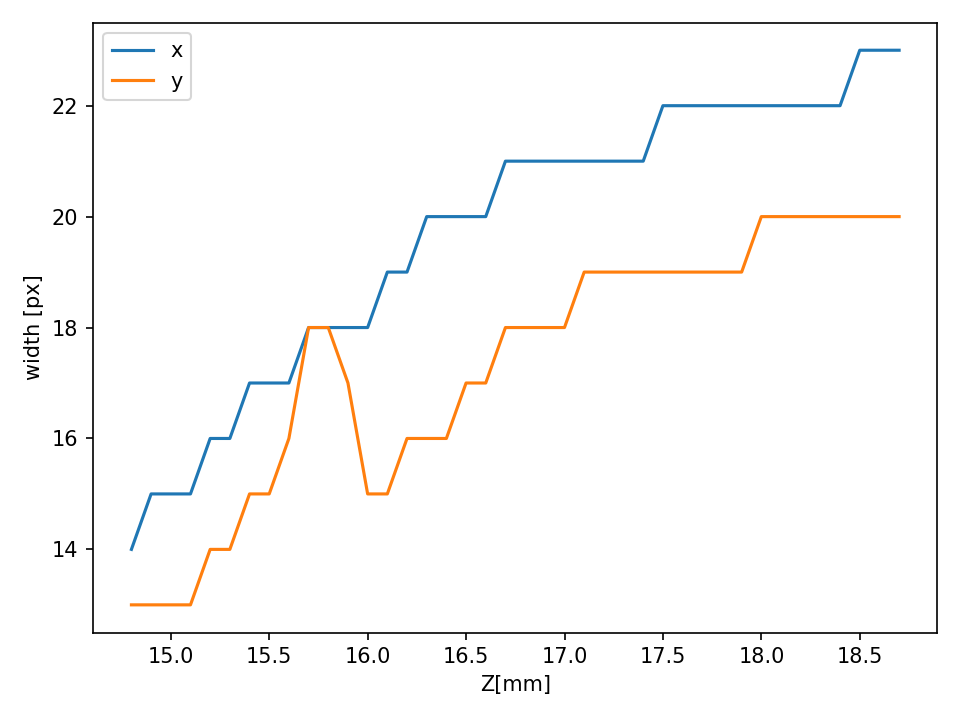

<IPython.core.display.Javascript object>


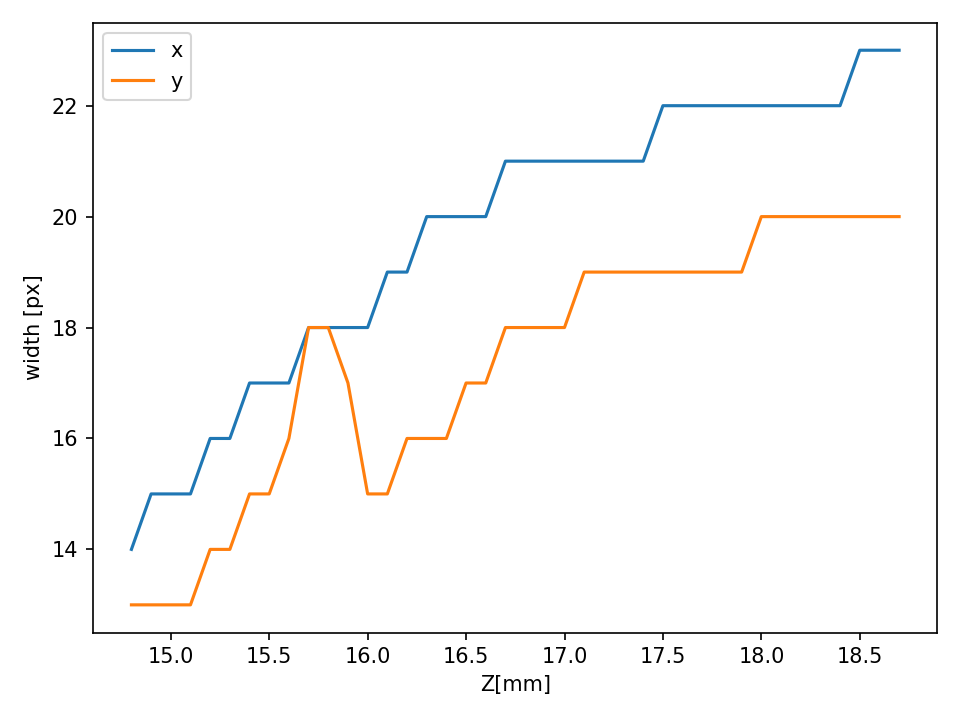

In [7]:
for id_x in range(3):
    for id_y in range(10):
        beam_i = tomo.beam_l[id_x][id_y]
        beam_i.plot_width(limit_z_fit=False)

## Plot single ROIs (Region of interest around beams)

In [ ]:
id_x = 0
id_y = 1
beam_i =tomo.beam_l[id_x][id_y]
beam_i.plot_rois()

## Plot ROIs and respective gaussian fits

In [ ]:
id_x = 0
id_y = 1
beam_i =tomo.beam_l[id_x][id_y]
beam_i.plot_gauss_fit(limit_z_fit = False)

## Plot cross sections

In [ ]:
for i in range(10):
    tomo.plot_cross_section(i)

tomo.plot_cross_section(35)
tomo.plot_cross_section(0)

# Extract beam parameters (tilt_x, tilt_y, div_x, div_y) 

## All beams - Find direction cosines and divergence full angles

In [10]:
tomo.set_max_z(16.0)
tomo.find_dir_cos(limit_z_fit = True, debug = False) #loops over beam method beam_i.find_dir_cos()
tomo.find_div(limit_z_fit = True, debug = False)

Tomo.max_z_fit and Tomo.max_z_idx_fit have been updated.
beam_i.max_z_fit and beam_i.max_z_idx_fit have been updated in all beams.
The fit is limited to the useful cross sections, defined by tomo.set_max_z()
The direction cosines of the beam idx=0, idy = 0 have been updated:
e_x = -0.100, e_y = 0.136, e_z = 0.986
The direction cosines of the beam idx=0, idy = 1 have been updated:
e_x = -0.104, e_y = 0.109, e_z = 0.988
The direction cosines of the beam idx=0, idy = 2 have been updated:
e_x = -0.103, e_y = 0.089, e_z = 0.991
The direction cosines of the beam idx=0, idy = 3 have been updated:
e_x = -0.092, e_y = 0.084, e_z = 0.992
The direction cosines of the beam idx=0, idy = 4 have been updated:
e_x = -0.095, e_y = 0.067, e_z = 0.993
The direction cosines of the beam idx=0, idy = 5 have been updated:
e_x = -0.108, e_y = 0.047, e_z = 0.993
The direction cosines of the beam idx=0, idy = 6 have been updated:
e_x = -0.105, e_y = 0.066, e_z = 0.992
The direction cosines of the beam idx=0, id

## Single beams - Find direction cosines and divergence for single beams

In [9]:
tomo.set_max_z(16.0)

id_x = 0
id_y = 1

#beam_i =tomo.beam_l[id_x][id_y]
#beam_i.find_dir_cos(tomo.pixel_size, limit_z_fit = True, debug = False)
#beam_i.find_div(tomo.pixel_size, limit_z_fit = True, debug = False)

Tomo.max_z_fit and Tomo.max_z_idx_fit have been updated.
beam_i.max_z_fit and beam_i.max_z_idx_fit have been updated in all beams.


# All beams - plot divergence angles 

<IPython.core.display.Javascript object>


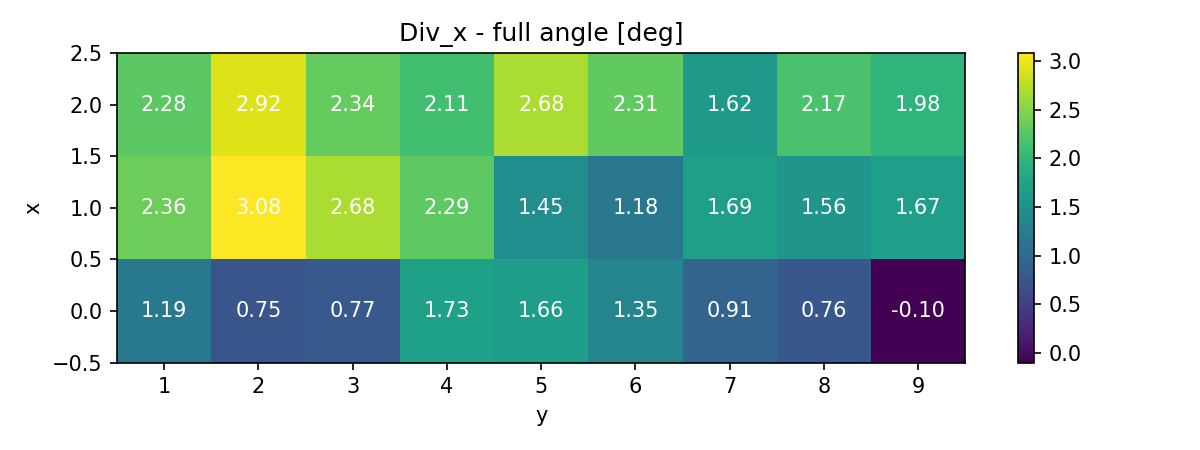

<IPython.core.display.Javascript object>


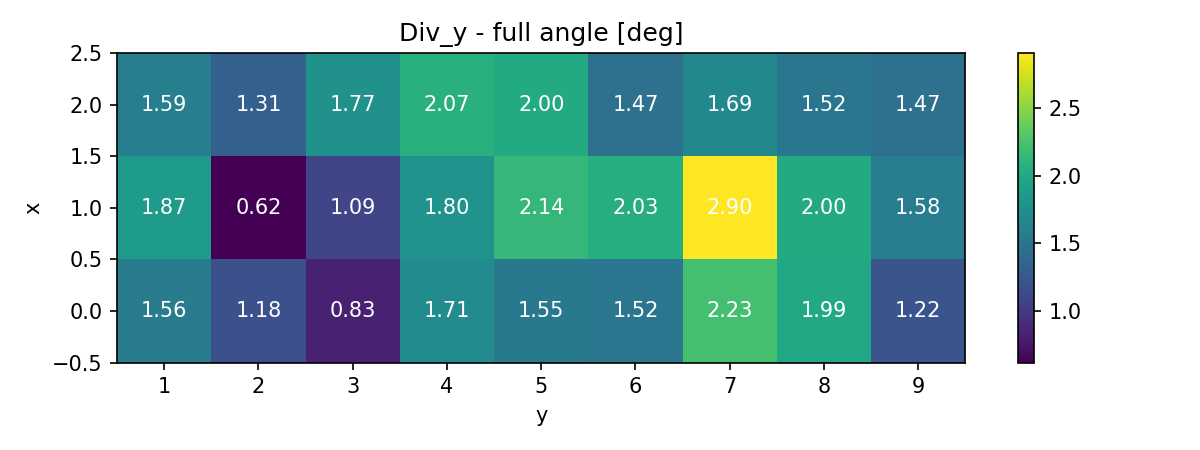

In [13]:
tomo.plot_div()

# All beams - plot direction of propagation

<IPython.core.display.Javascript object>


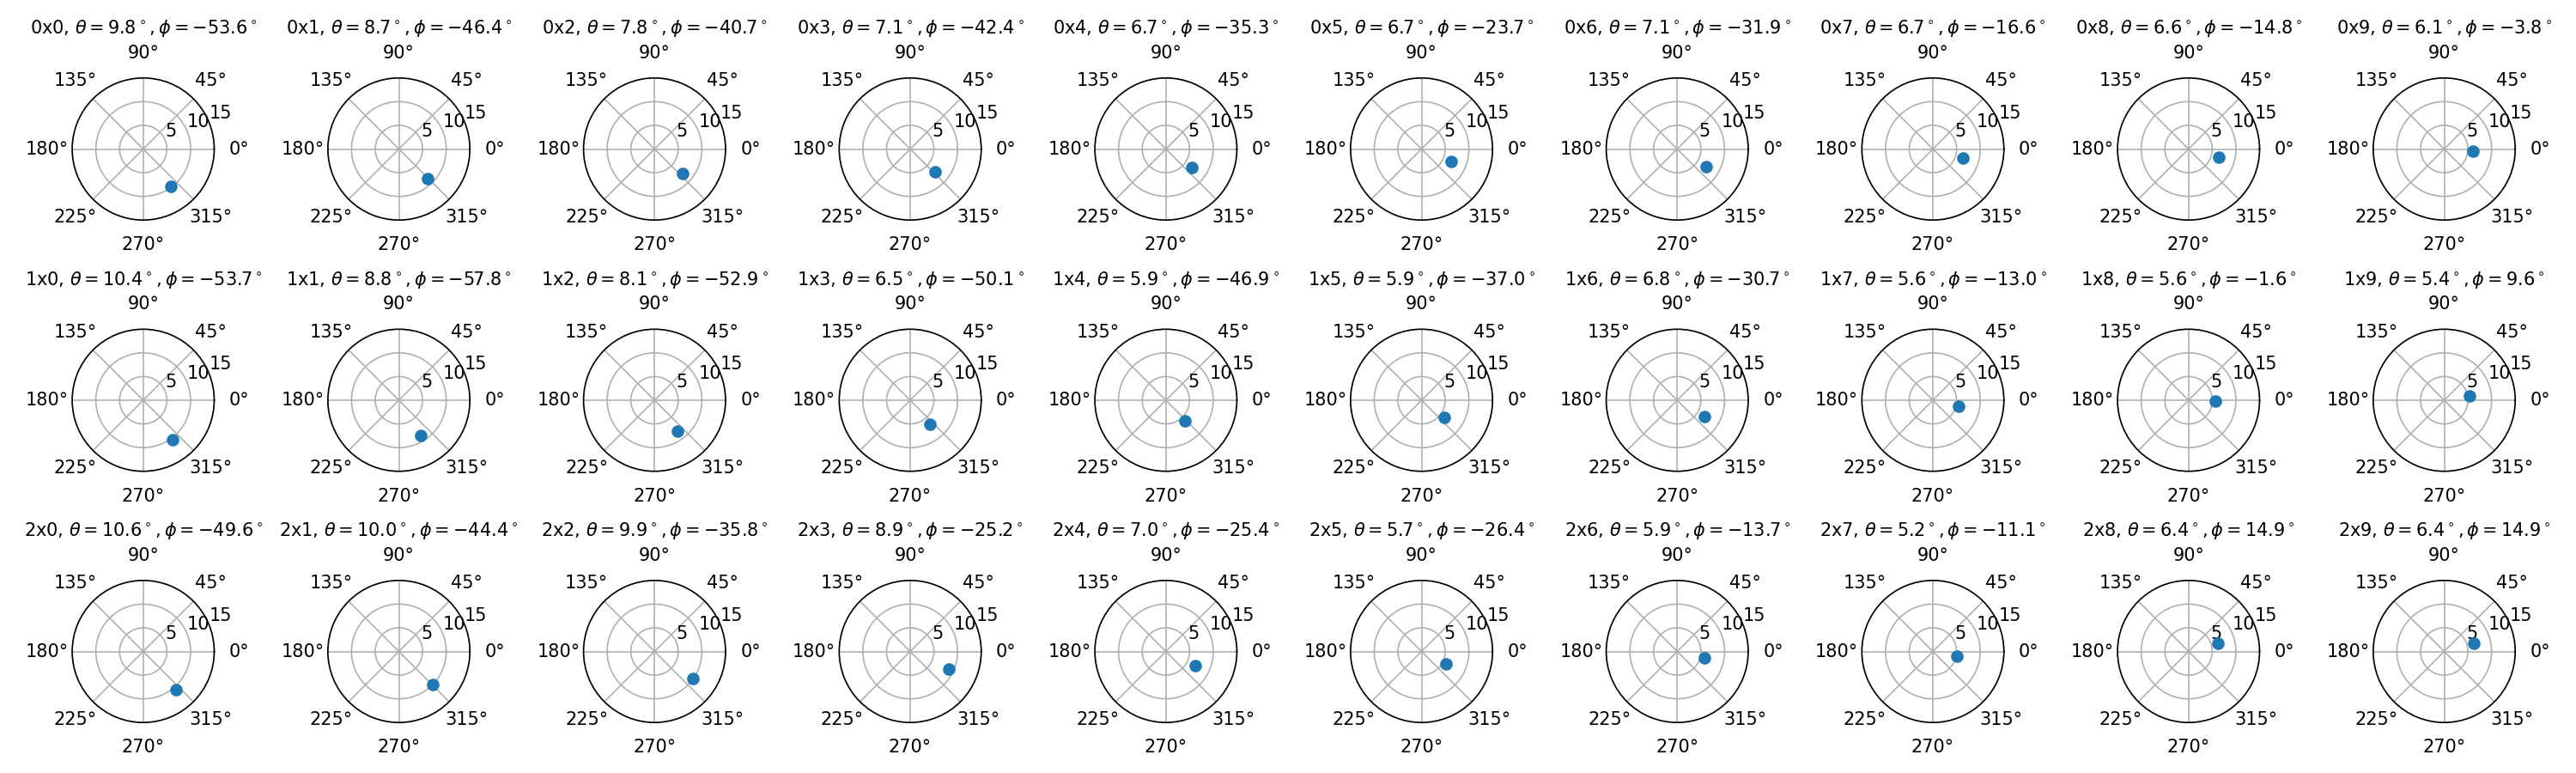

In [12]:
tomo.plot_dir()

C:\Users\Rui\AppData\Local\Temp/ipykernel_16232/163748097.py:1: RuntimeWarning: More than 50 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax_arr = plt.subplots(subplot_kw={'projection': 'polar'},


<IPython.core.display.Javascript object>


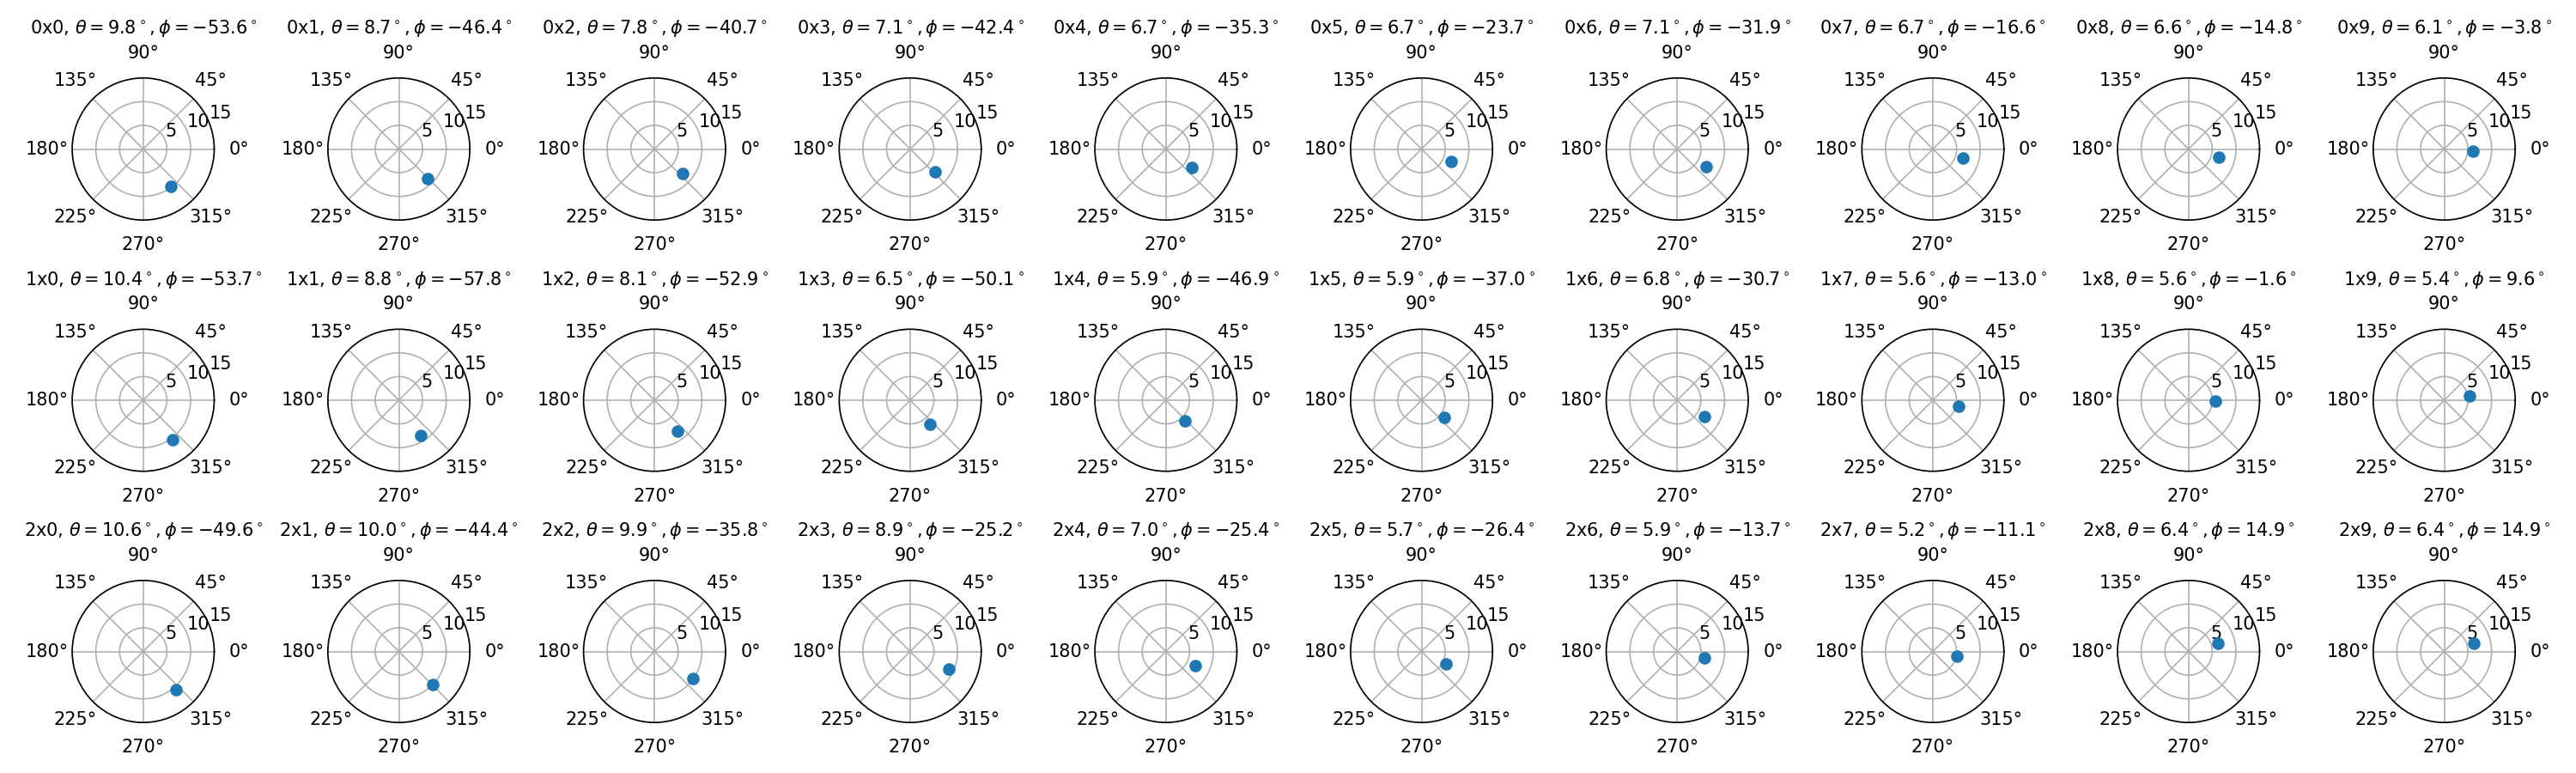

In [11]:
fig, ax_arr = plt.subplots(subplot_kw={'projection': 'polar'},
                           figsize = (2*tomo.shape[1], 2*tomo.shape[0]),
                           nrows = tomo.shape[0],
                           ncols = tomo.shape[1])

for id_x in range(tomo.shape[0]):
    for id_y in range(tomo.shape[1]):
        beam_i = tomo.beam_l[id_x][id_y]
        e_x, e_y, e_z = beam_i.e_x, beam_i.e_y, beam_i.e_z

        theta = np.arccos(e_z)
        phi = np.arctan(e_y/e_x)  
        label = f"{id_x:.0f}x{id_y:.0f}, $\\theta = {{ {np.degrees(theta):.1f} }}^\circ, \\phi = {{ {np.degrees(phi):.1f} }}^\circ$"

        ax_arr[id_x][id_y].plot(phi, np.degrees(theta), "o")
        ax_arr[id_x][id_y].set_title(f"{label}", fontsize = 10)
        ax_arr[id_x][id_y].set_rlim(0, 15)
    
plt.tight_layout()

In [ ]:
n_rows = tomo.shape[0]
n_cols = tomo.shape[1]

fig, ax_arr = plt.subplots(subplot_kw={'projection': 'polar'},
                           figsize = (12, 6),
                           nrows = n_rows,
                           ncols = n_cols)

for id_x in range(n_rows):
    for id_y in range(n_cols):
        ax = ax_arr[-id_x-1][id_y]
        beam_i = tomo.beam_l[id_x][id_y]
        e_x, e_y, e_z = beam_i.e_x, beam_i.e_y, beam_i.e_z
        
        theta = np.arccos(e_z)
        phi = np.arctan(e_y/e_x)  
        #label = f"{id_x:.0f}x{id_y:.0f}"

        ax.set_rlim(0, 1.5)
        ax.set_rticks([0.5, 1, 1.5])
        ax.set_yticklabels([])
        
        ax.plot(phi, np.degrees(theta), "o")
        #ax.set_title(f"{label}", fontsize = 10)
        
plt.tight_layout()


In [ ]:
 #ax.set_rticks([])
            #ax2.set_rgrids([0.5, 1, 1.5])
                        #ax.set_xticklabels(['N', '', 'W', '', 'S', '', 'E', ''])
            #ax.set_xticklabels(['', '', '', '', '', '', '', ''])
            #ax.set_rlabel_position(120)

            #ax.plot(phi, np.degrees(theta), "o")
            #ax.set_title(f"{label}", fontsize = 10)

In [ ]:
div_x_arr.shape

In [ ]:
id_x = 0
id_y = 0

div_x_arr = np.zeros(x.shape)
for id_x in range(x.shape[0]):
    for id_y in range(x.shape[1]):
        beam_i = tomo.beam_l[id_x][id_y]
        div_x_arr[id_x, id_y] = beam_i.div_x
        #print(id_x, id_y, ":", beam_i.div_x)
div_x_arr

In [ ]:
# Create a grid of x, y values
x_values = np.linspace(-5, 5, 10)
y_values = np.linspace(-5, 5, 10)
x, y = np.meshgrid(x_values, y_values)

# Evaluate the function on the grid
z = f(x, y)

# Plot using a colormap
plt.figure(figsize=(8, 6))
colormap = plt.pcolormesh(x, y, z, cmap='viridis', shading='auto')

# Print the value of the function on each square
for (i, j), val in np.ndenumerate(z):
    plt.text(x_values[j], y_values[i], f"{val:.2f}", ha='center', va='center', color='white')

# Adding color bar, labels and title
plt.colorbar(colormap)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scalar values of f(x, y) over a grid')
plt.show()


## Visualise first layer with ROI

## Beam and cross section classes

## Collect cross sections of the same beam for different z